# 1.0: DATA PREPROCESSING

**Step 1: Initial EDA**

we perform initial Exploratory Data Analysis (EDA) to analyse and investigate our chosen dataset and summarize their main characteristics

**About Dataset**

The basis of this dataset is taken from WaterBase water quality data shared on Europian Environment Agency (EAA). After most of the columns there were dropped, new data was created with the help of Worldbank, OSM, Foursquare, SEDAC. After removing the country and city information from the available location information, socioeconomic features of that country were added. However, the distance of certain road types close to those coordinates was also added with OSM. It is thought that such information plays an important role in the pollution of waters.

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

In [92]:
file_path = '../data/raw/waterPollution.csv'

try:
    pd.set_option('display.max_columns', None)
    df = pd.read_csv(file_path)  # For CSV files
    print(df.head())  # Display the first few rows
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

  parameterWaterBodyCategory observedPropertyDeterminandCode  \
0                         RW                  CAS_14797-65-0   
1                         RW                  CAS_14797-65-0   
2                         RW                   EEA_3164-07-6   
3                         RW                  CAS_14797-55-8   
4                         RW                   EEA_3151-01-7   

  procedureAnalysedFraction procedureAnalysedMedia    resultUom  \
0                     total                  water    mg{NO2}/L   
1                     total                  water    mg{NO2}/L   
2                     total                  water  {massRatio}   
3                     total                  water    mg{NO3}/L   
4                     total                  water       mmol/L   

   phenomenonTimeReferenceYear parameterSamplingPeriod  resultMeanValue  \
0                         2009        2009-01--2009-12         0.063310   
1                         2009        2009-01--2009-12        

examine data types, statistical summaries

In [94]:
print(df.info())  # Check data types, non-null values, memory usage
print(df.describe()) # Summary statistics for numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   parameterWaterBodyCategory                   20000 non-null  object 
 1   observedPropertyDeterminandCode              20000 non-null  object 
 2   procedureAnalysedFraction                    20000 non-null  object 
 3   procedureAnalysedMedia                       20000 non-null  object 
 4   resultUom                                    20000 non-null  object 
 5   phenomenonTimeReferenceYear                  20000 non-null  int64  
 6   parameterSamplingPeriod                      20000 non-null  object 
 7   resultMeanValue                              20000 non-null  float64
 8   waterBodyIdentifier                          20000 non-null  object 
 9   Country                                      19896 non-null  object 
 10

check for data length, duplicated rows and missing values 

In [96]:
# check for data length
data_length = len(df)
print(f"Instances in this dataset: {data_length}")

Instances in this dataset: 20000


In [97]:
# Check for duplicates
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 79



Missing Value Visualization (Matrix Plot):


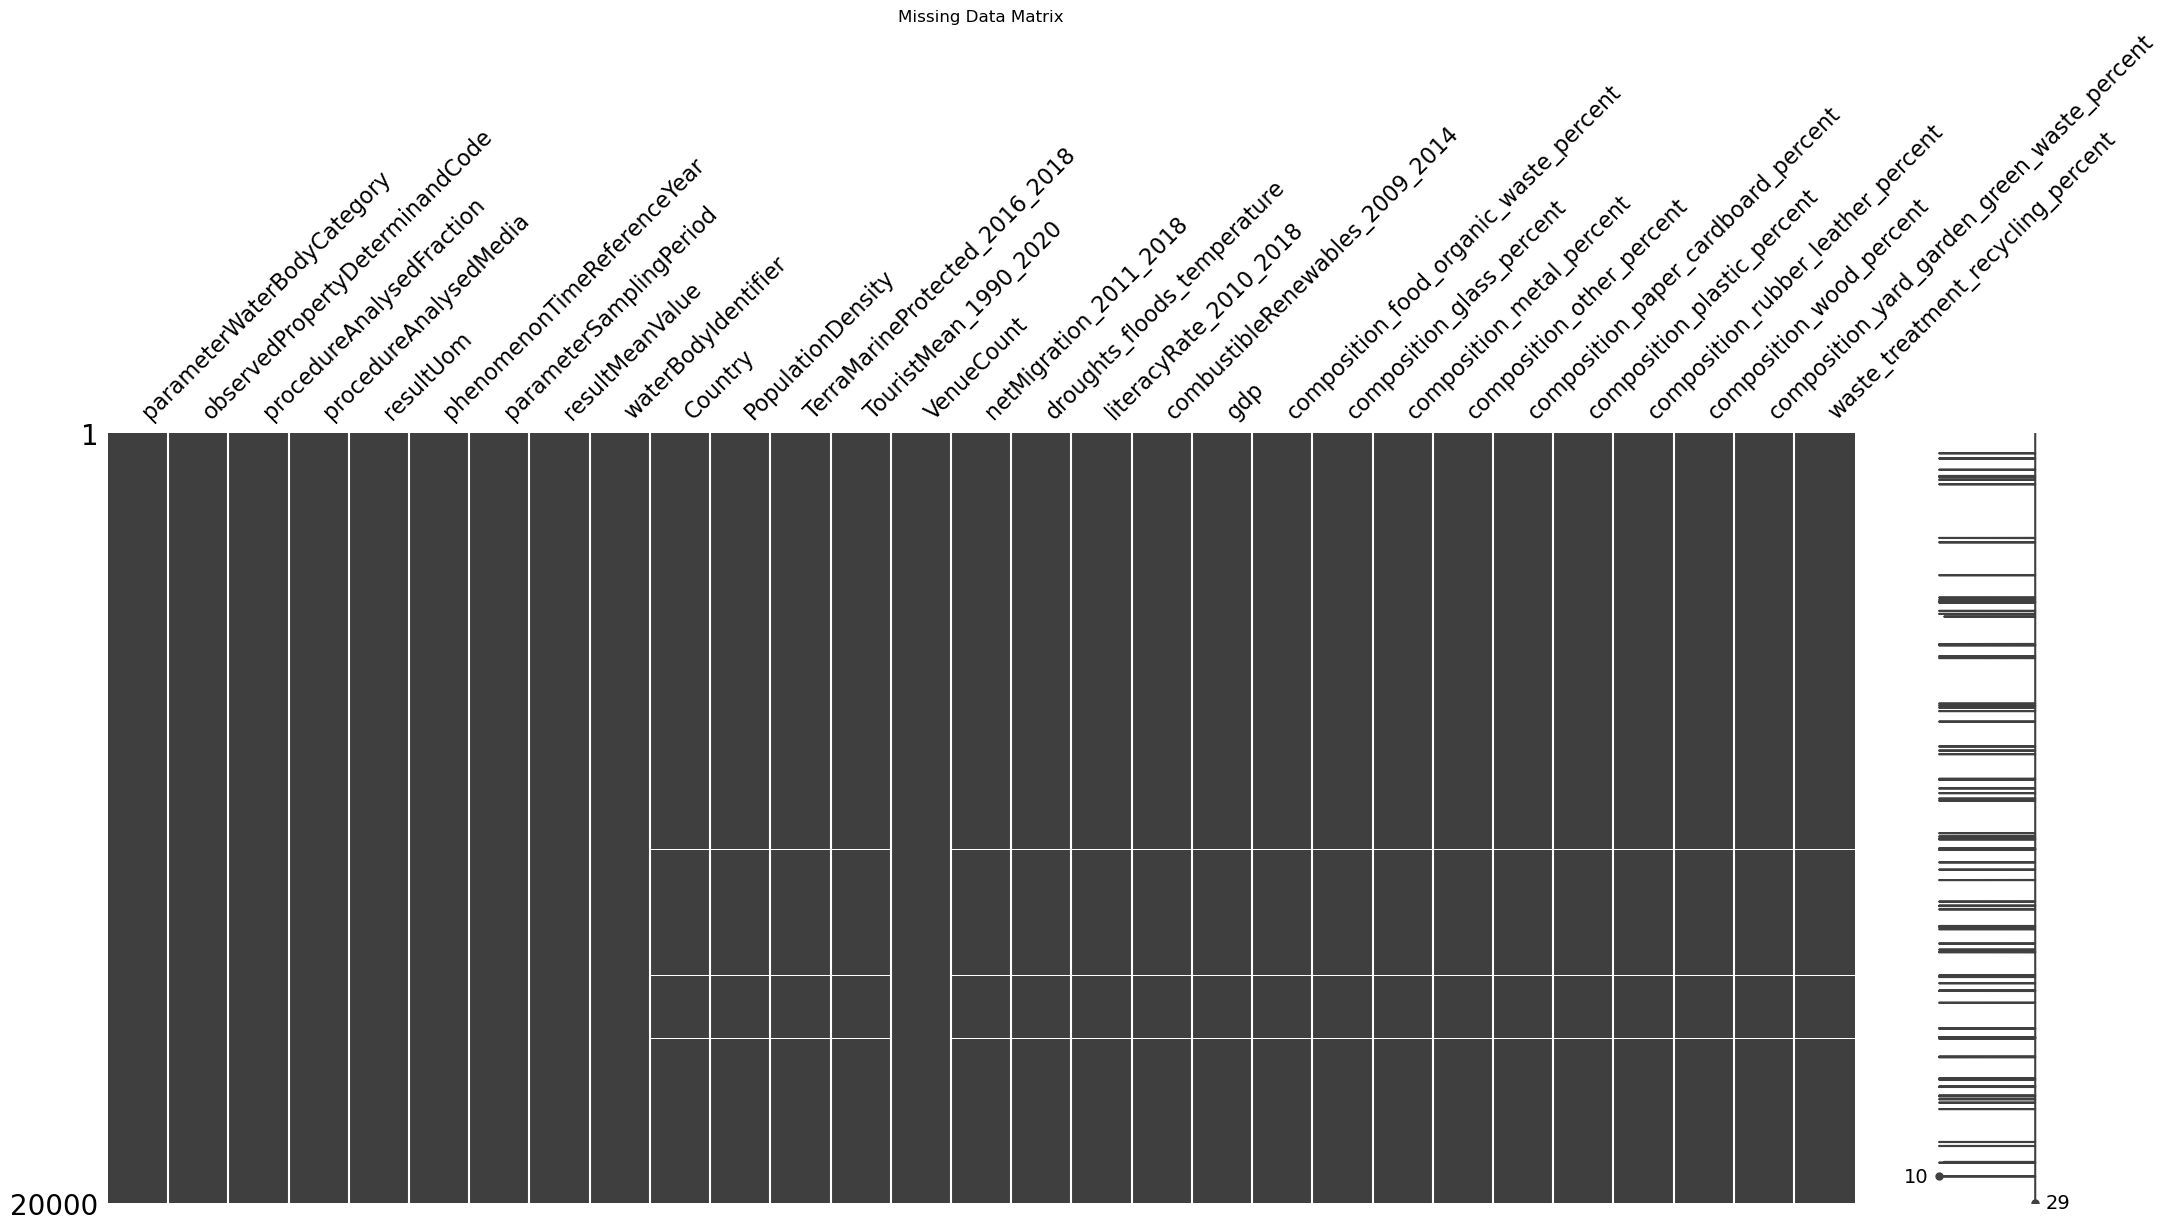

In [98]:
# check for missing values
print("\nMissing Value Visualization (Matrix Plot):")
msno.matrix(df) # Matrix plot of missing values - visually identify patterns
plt.title('Missing Data Matrix')
plt.show()

Exploring numerical variables

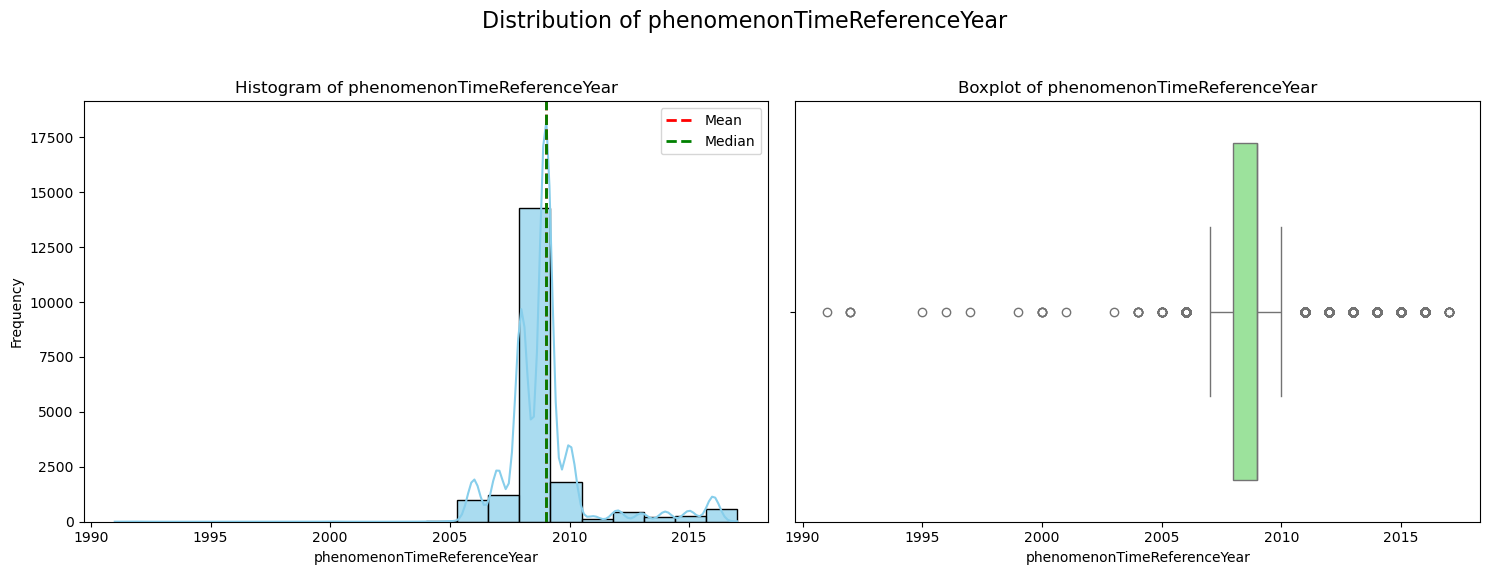

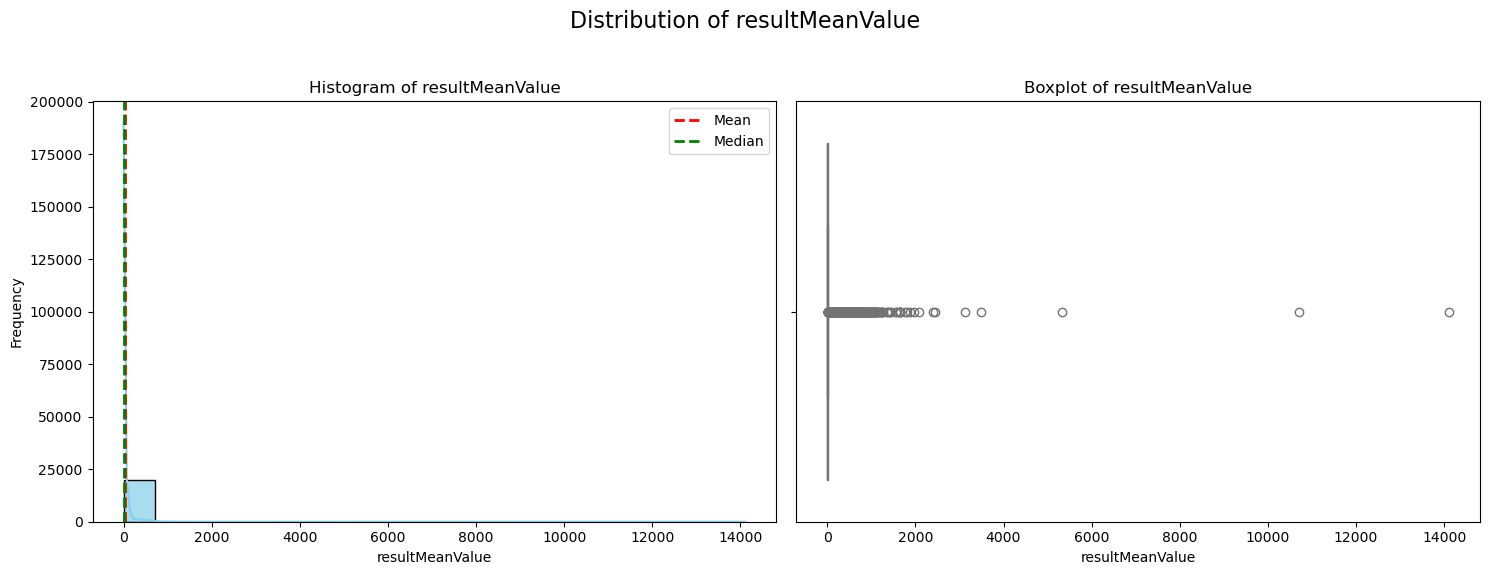

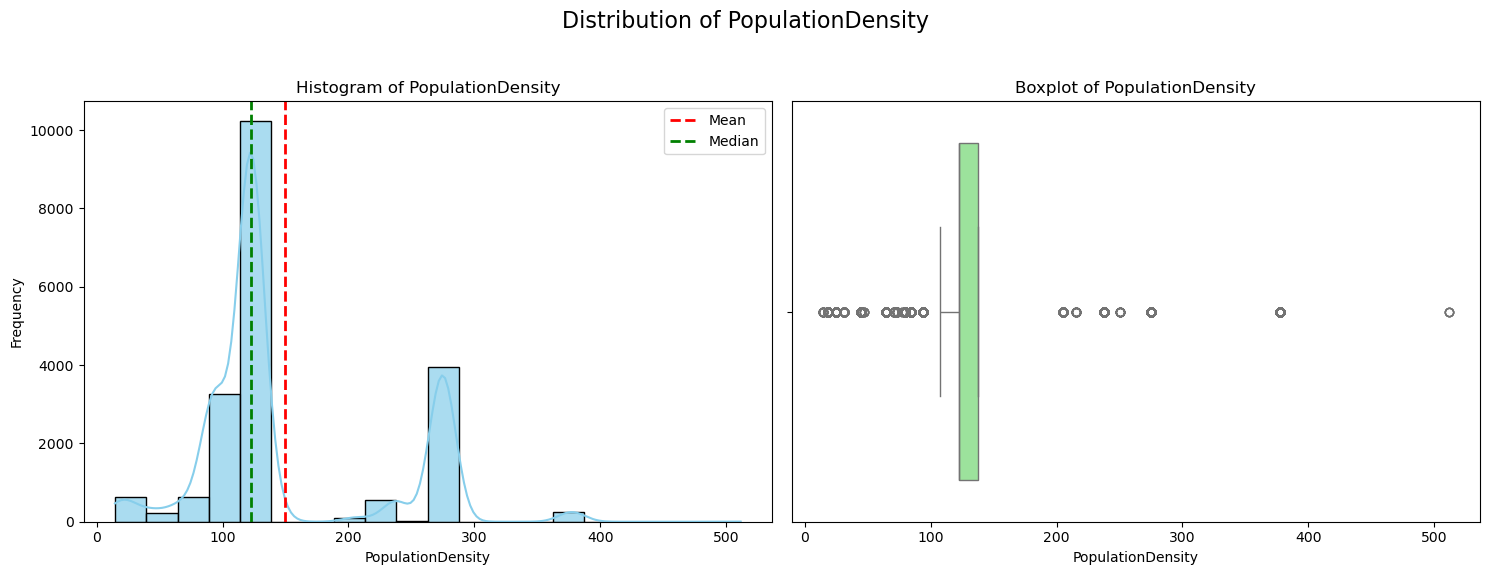

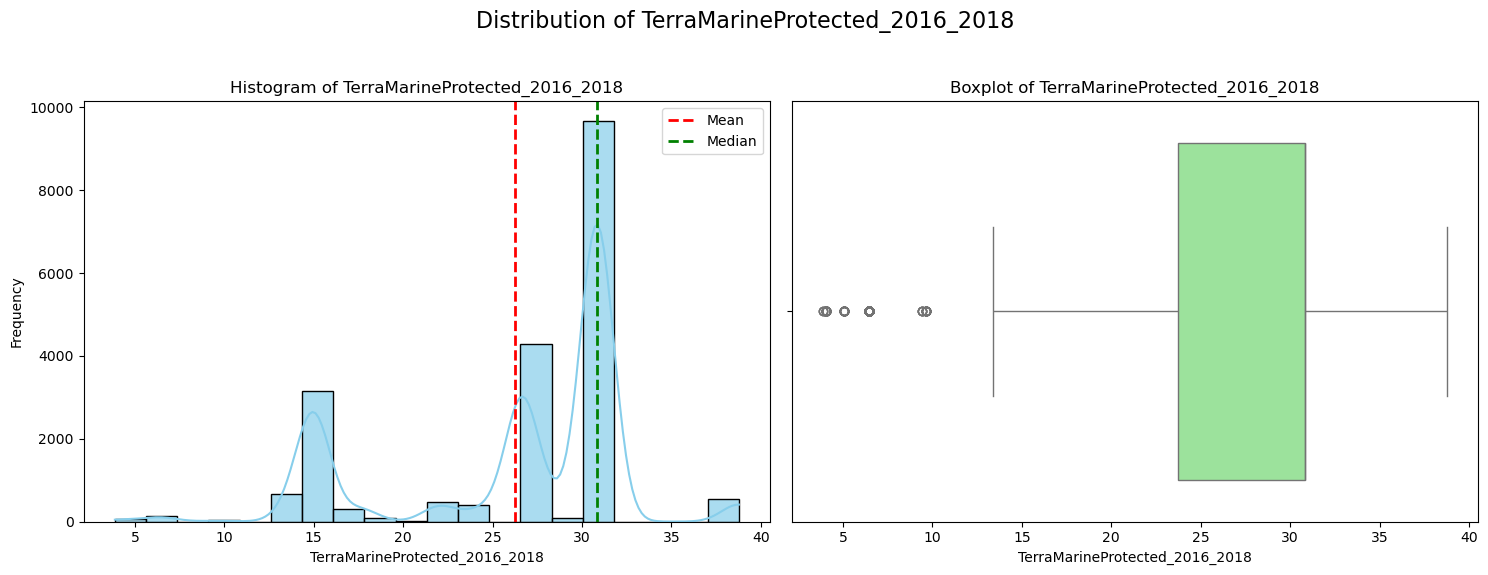

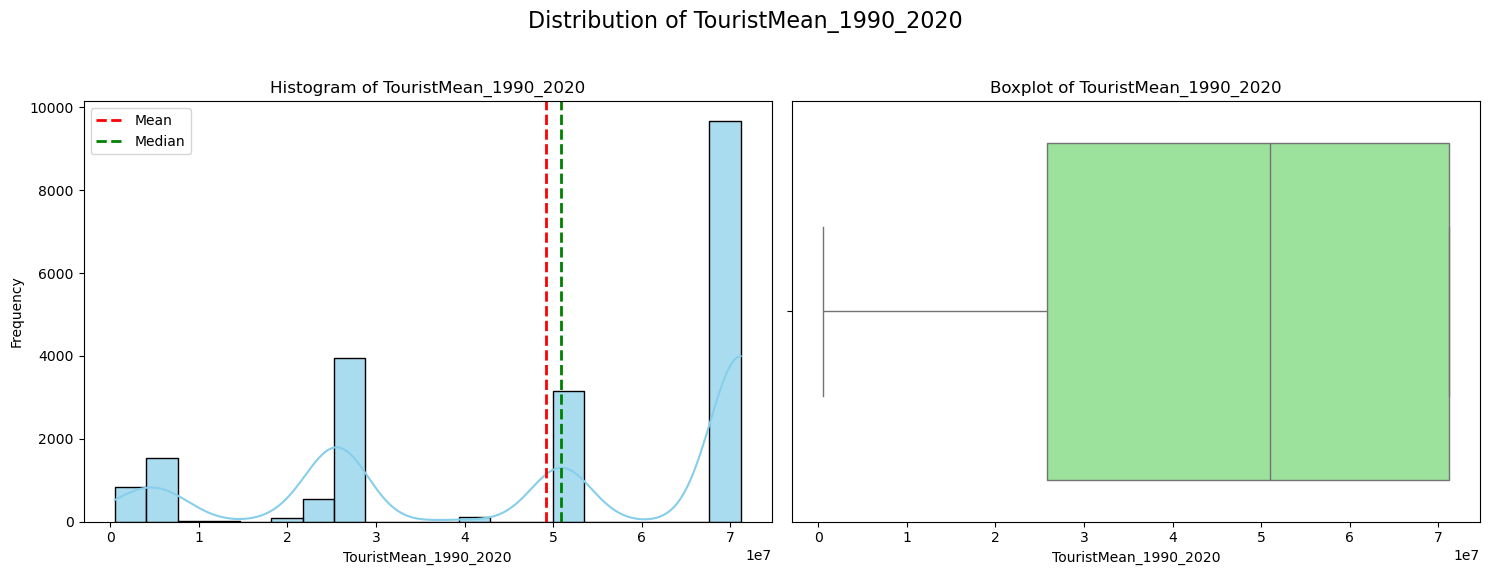

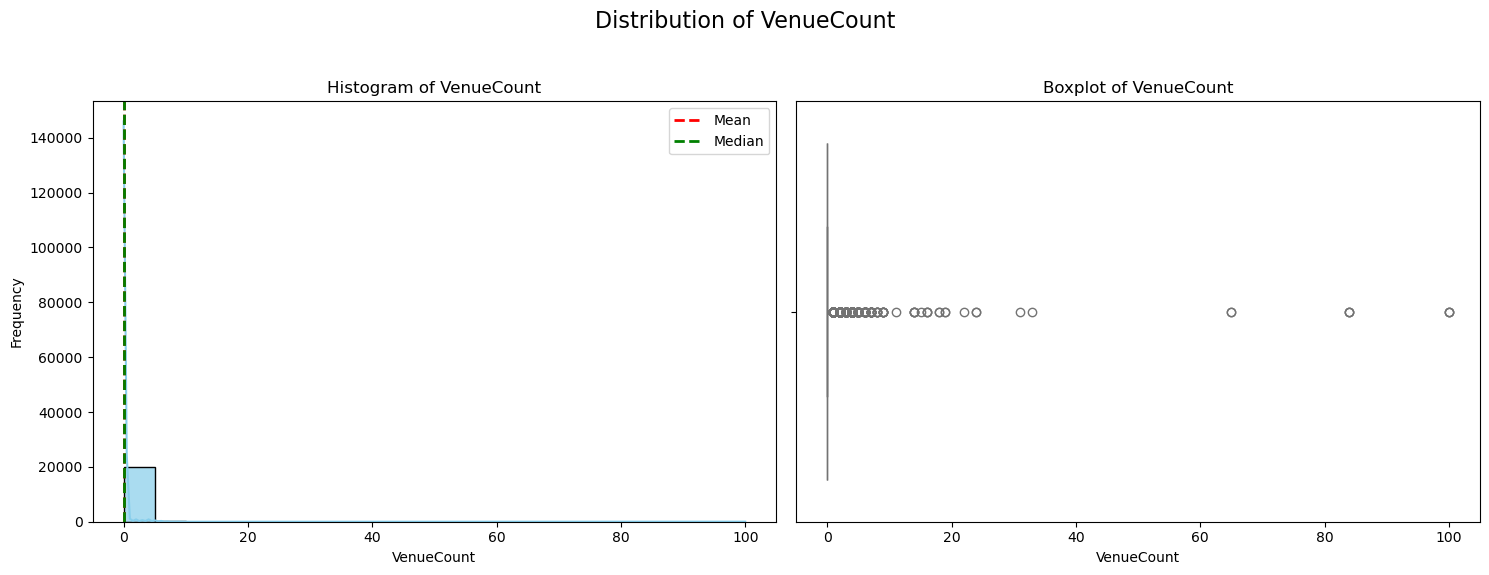

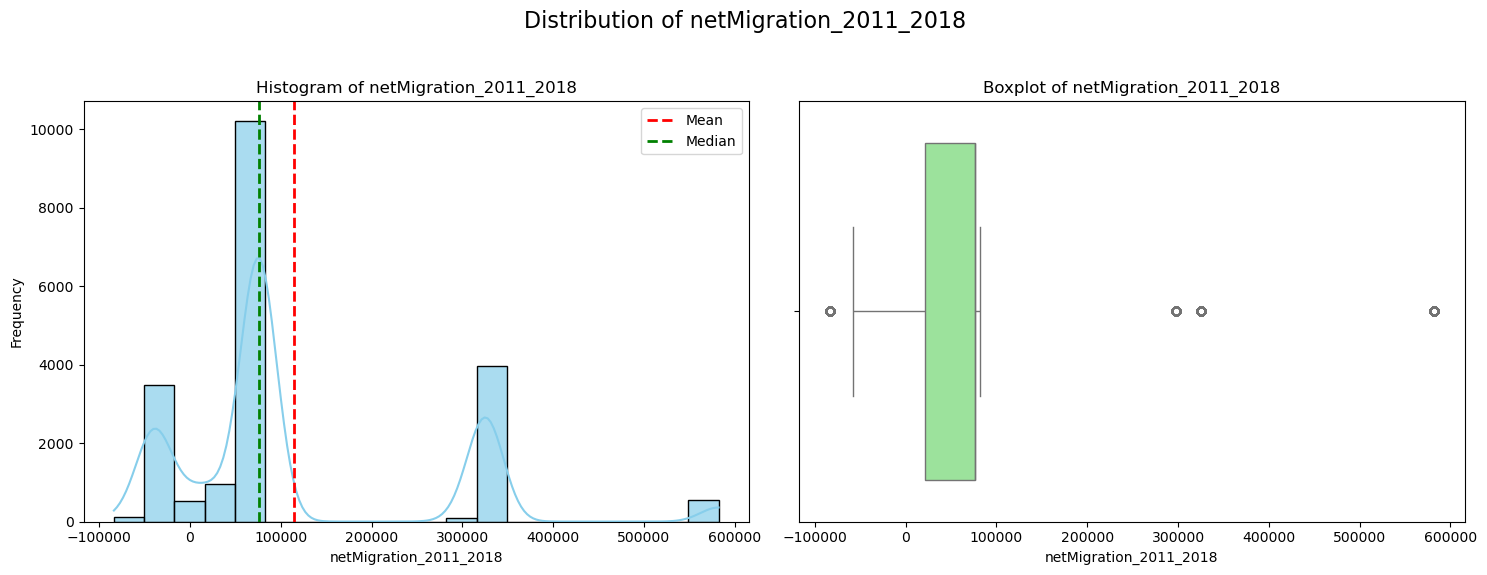

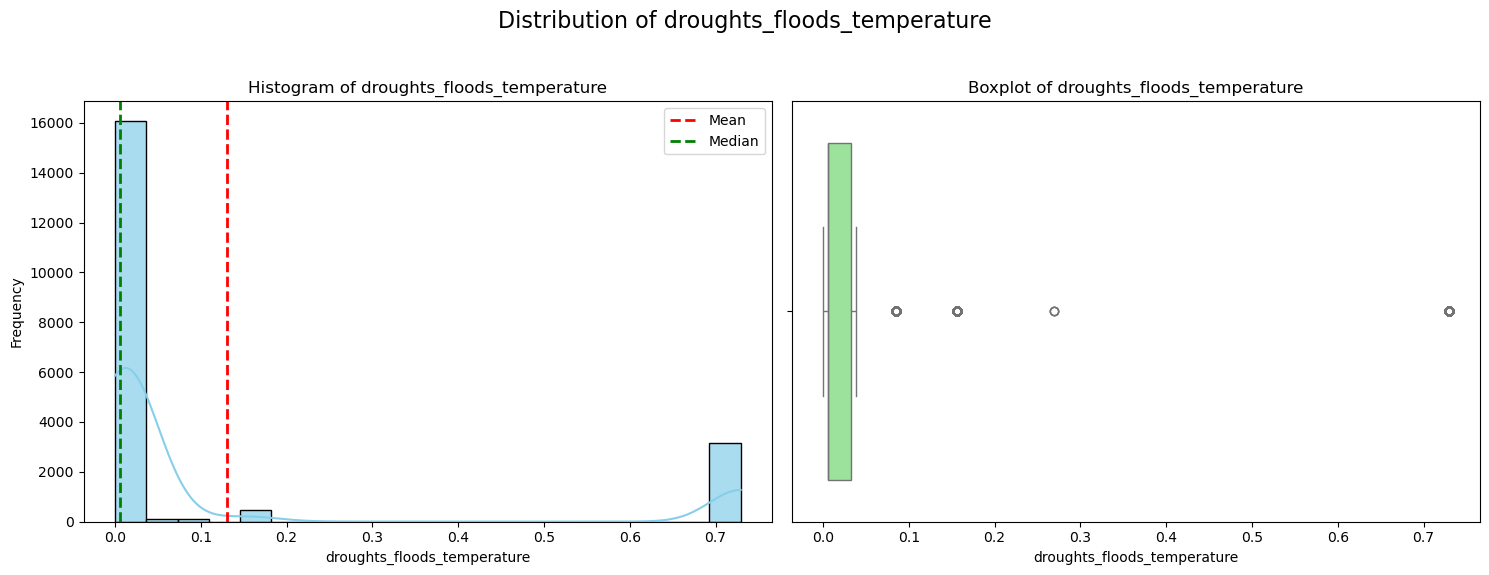

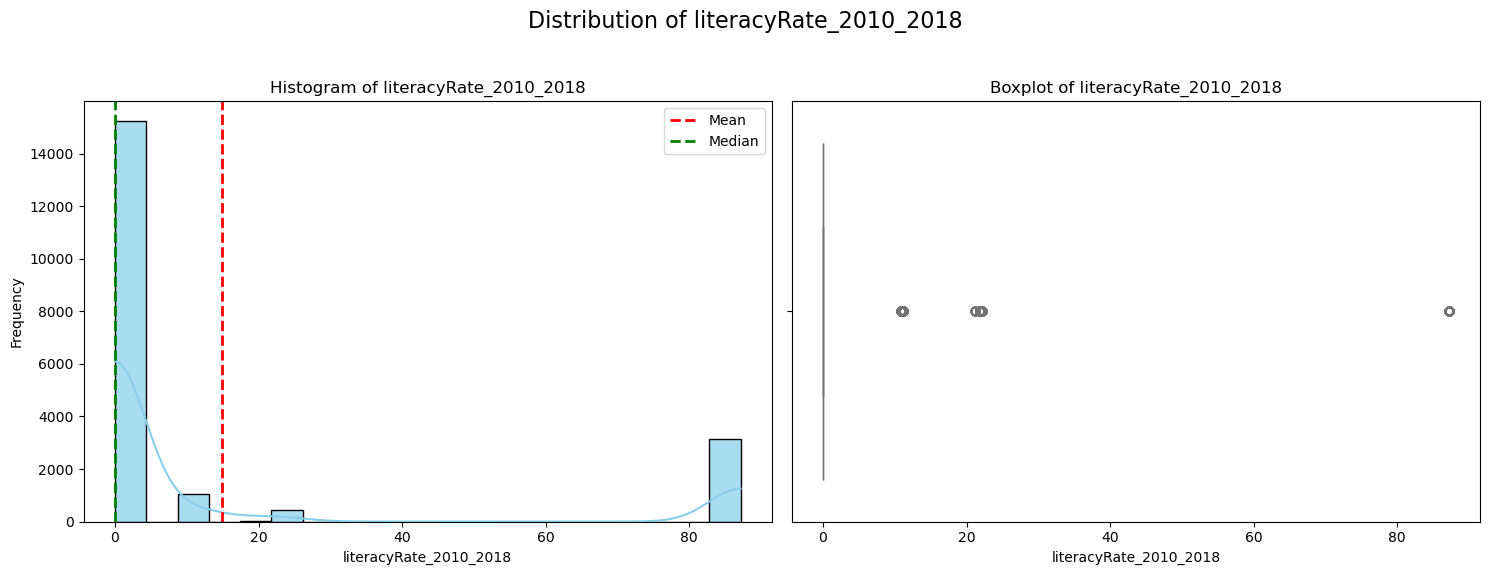

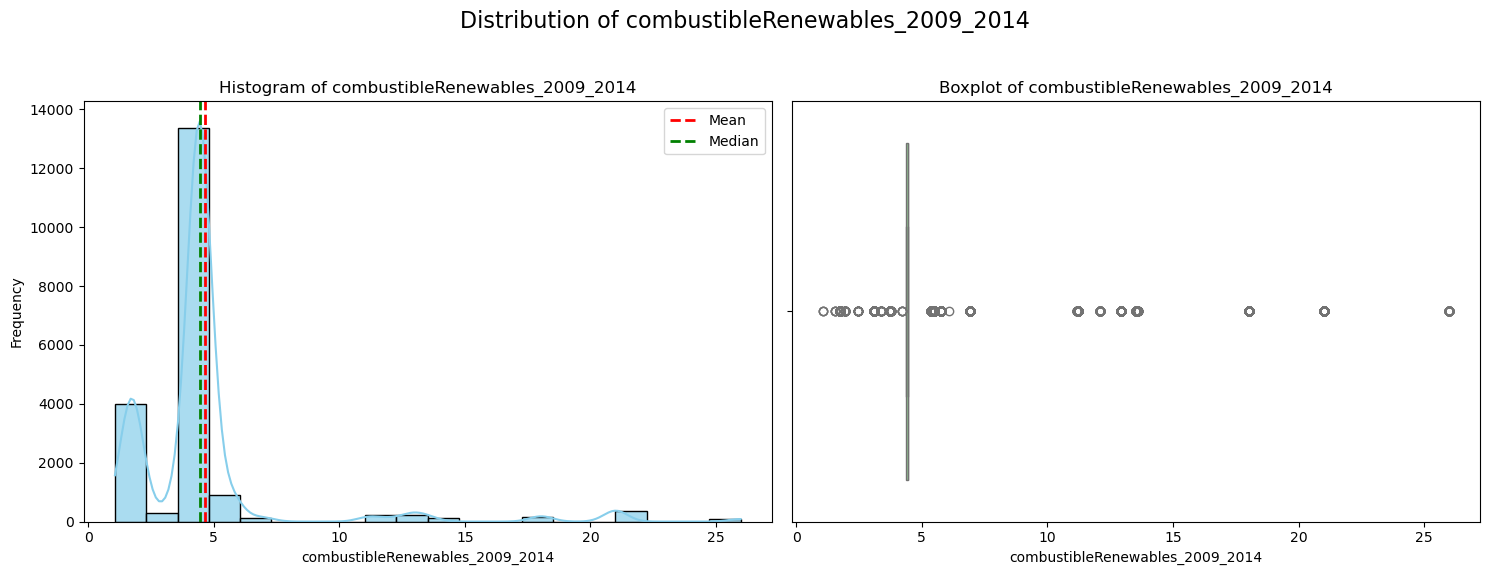

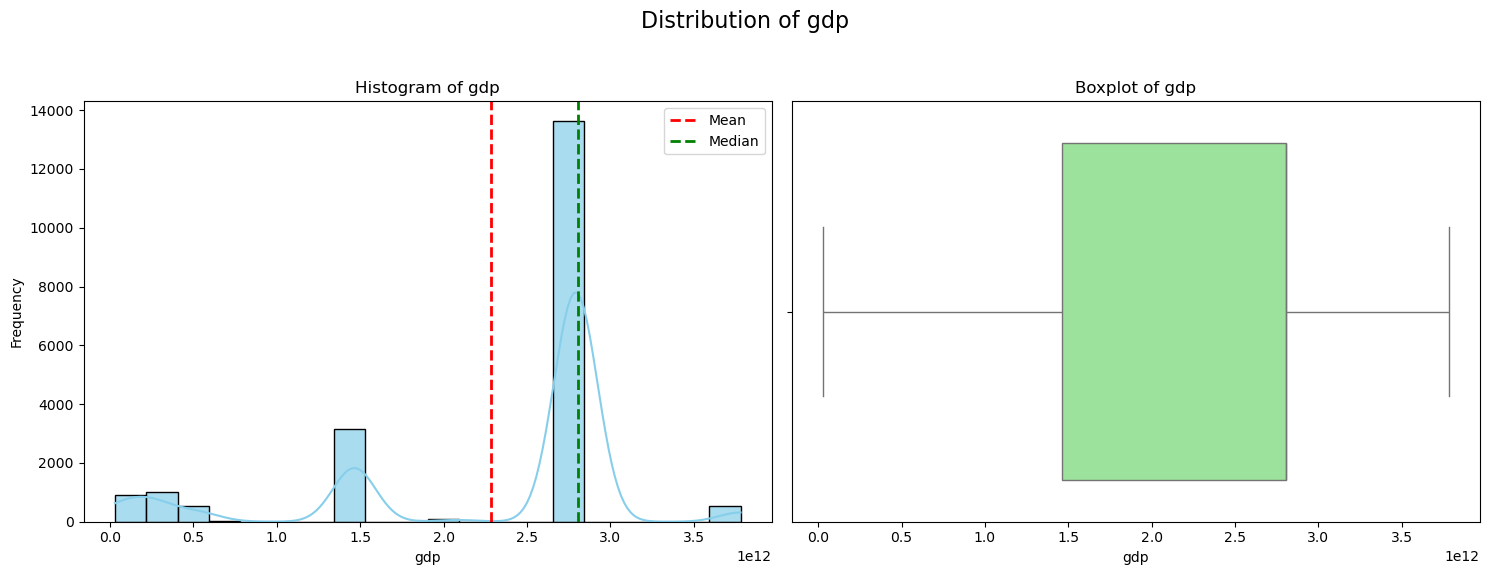

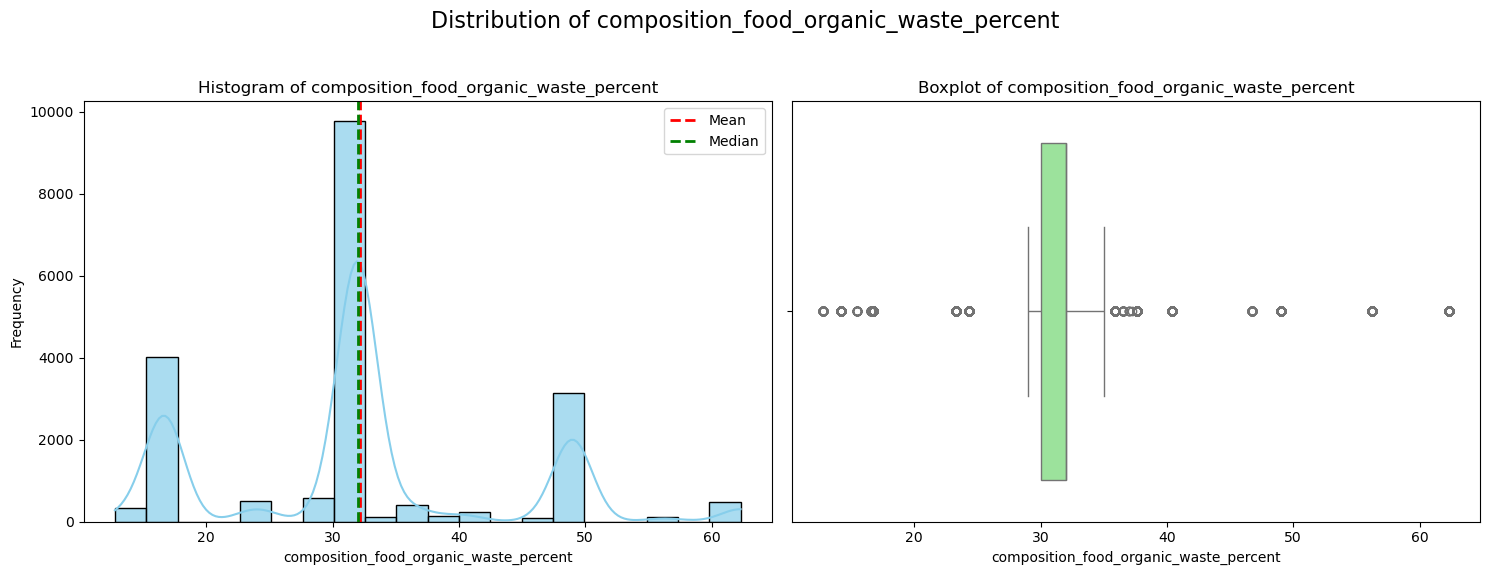

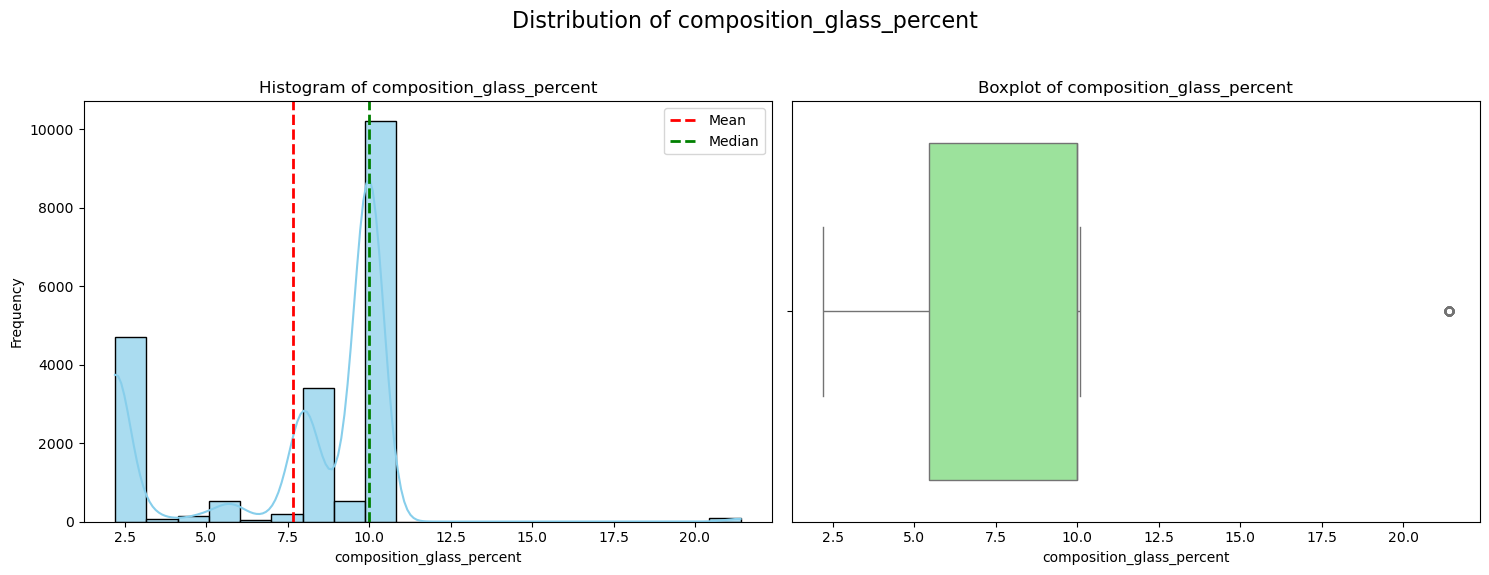

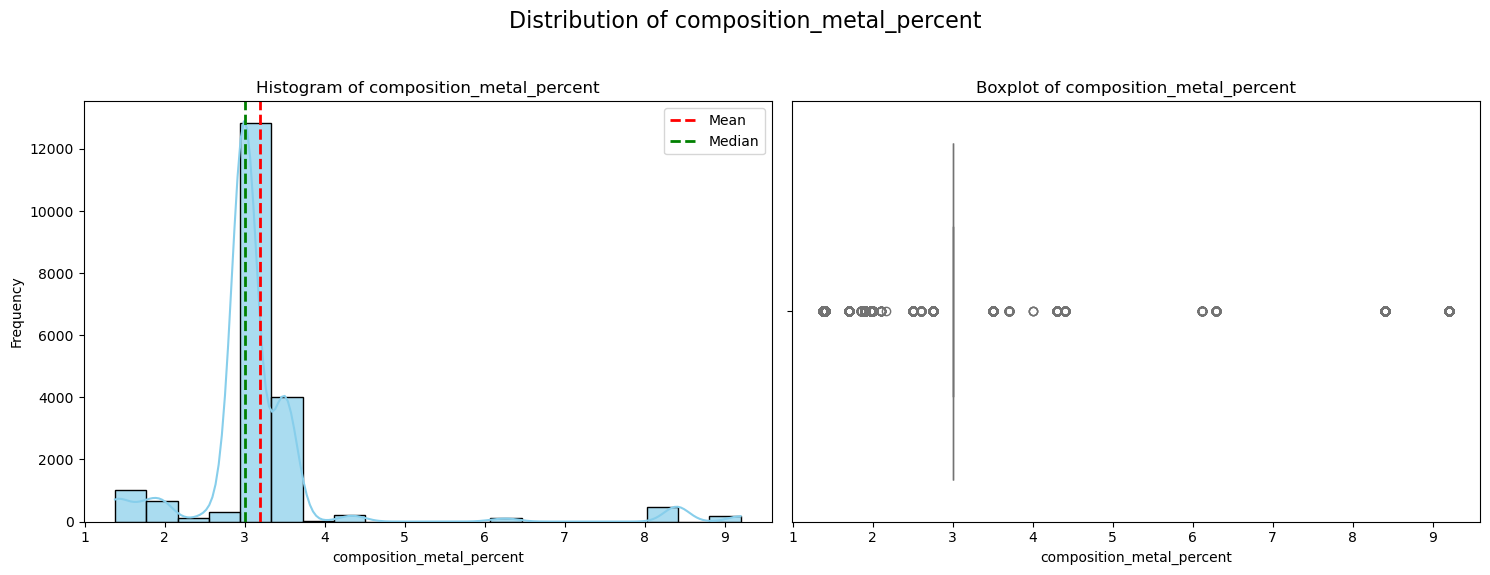

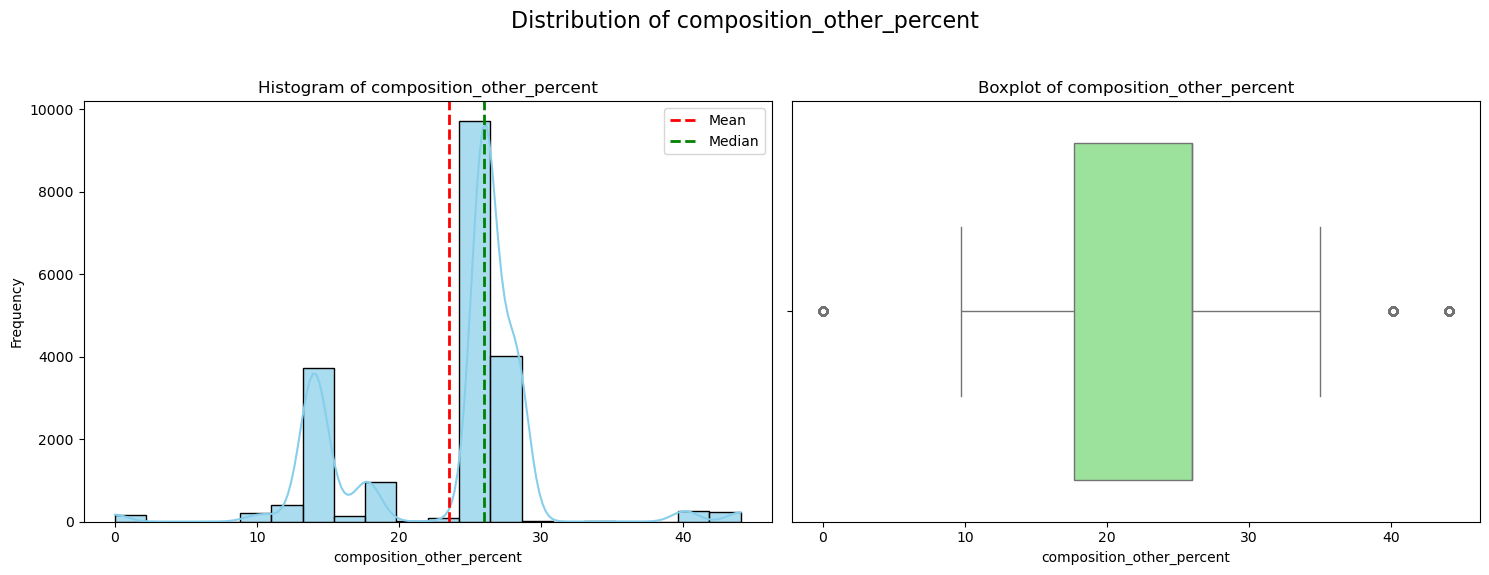

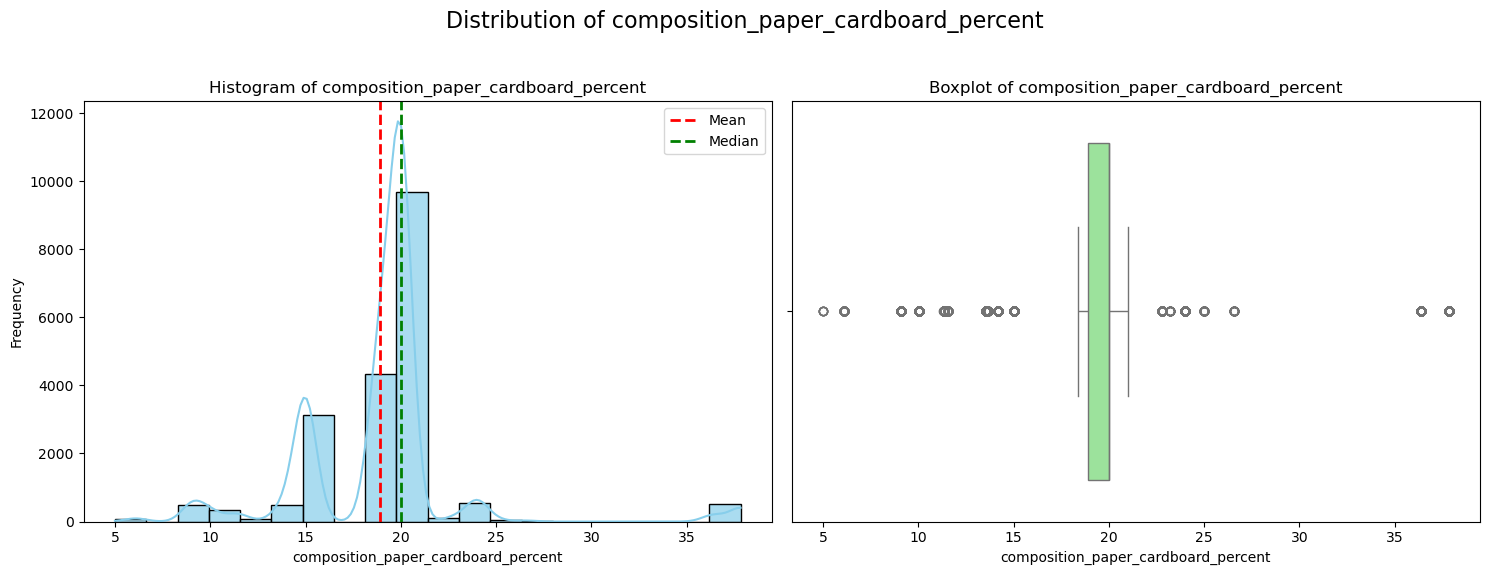

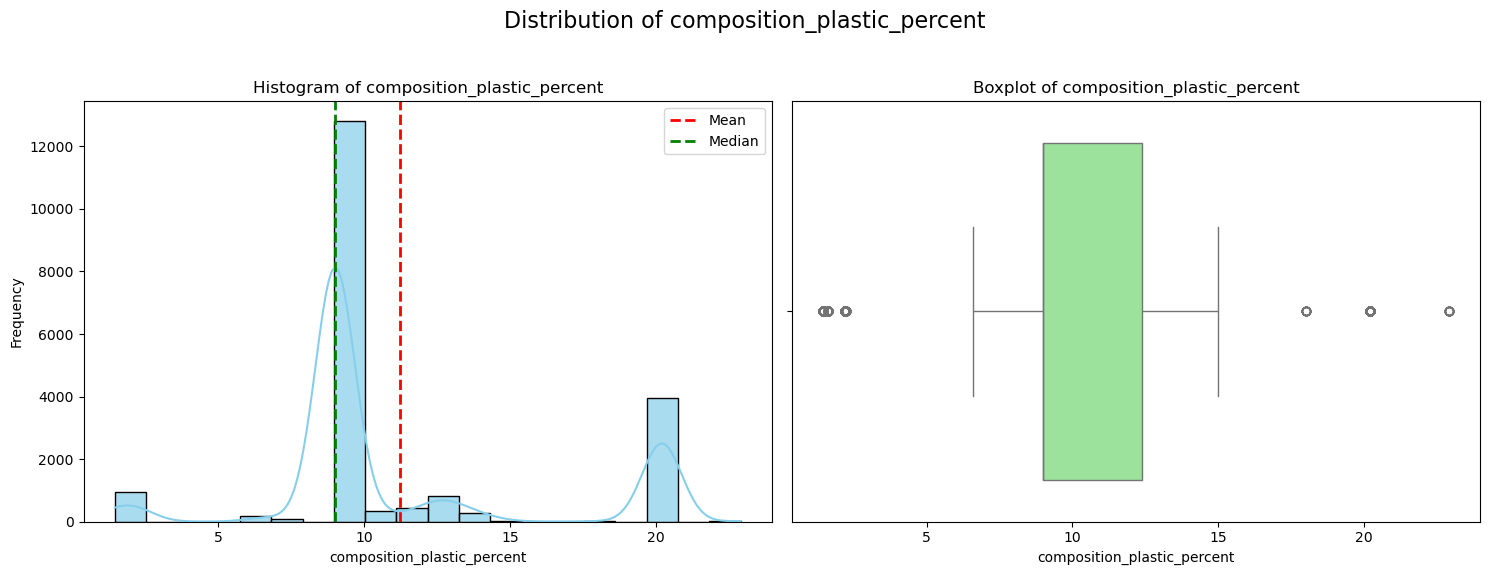

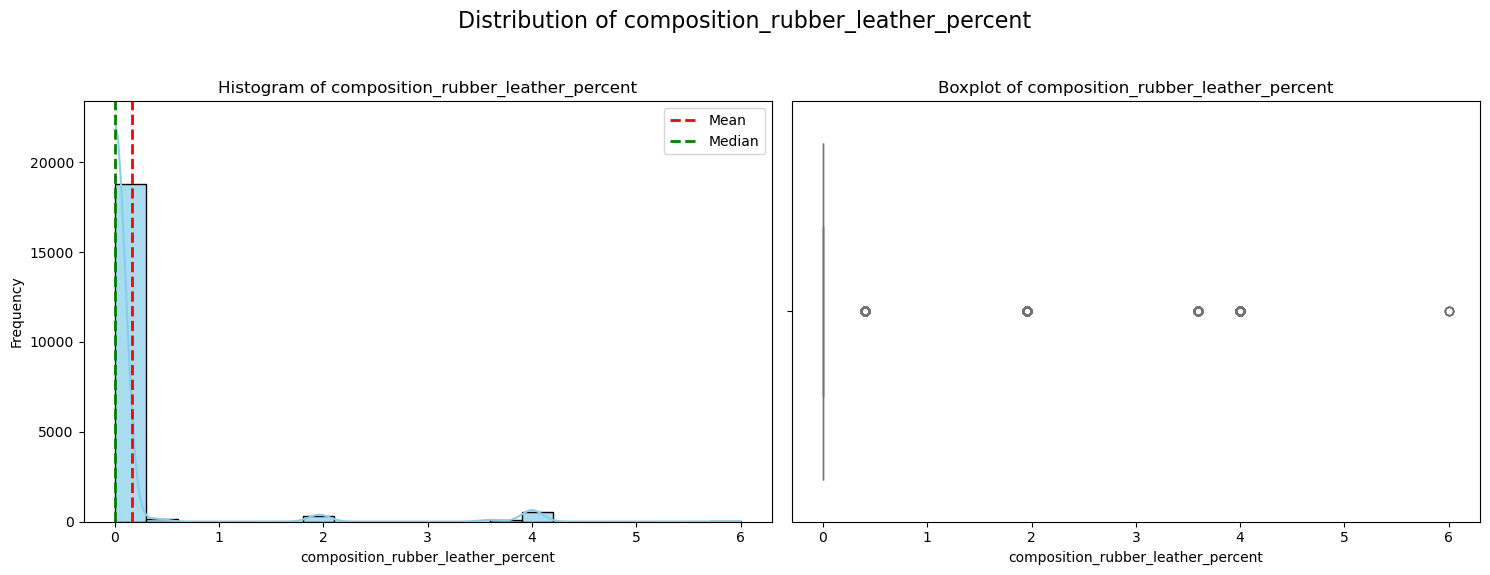

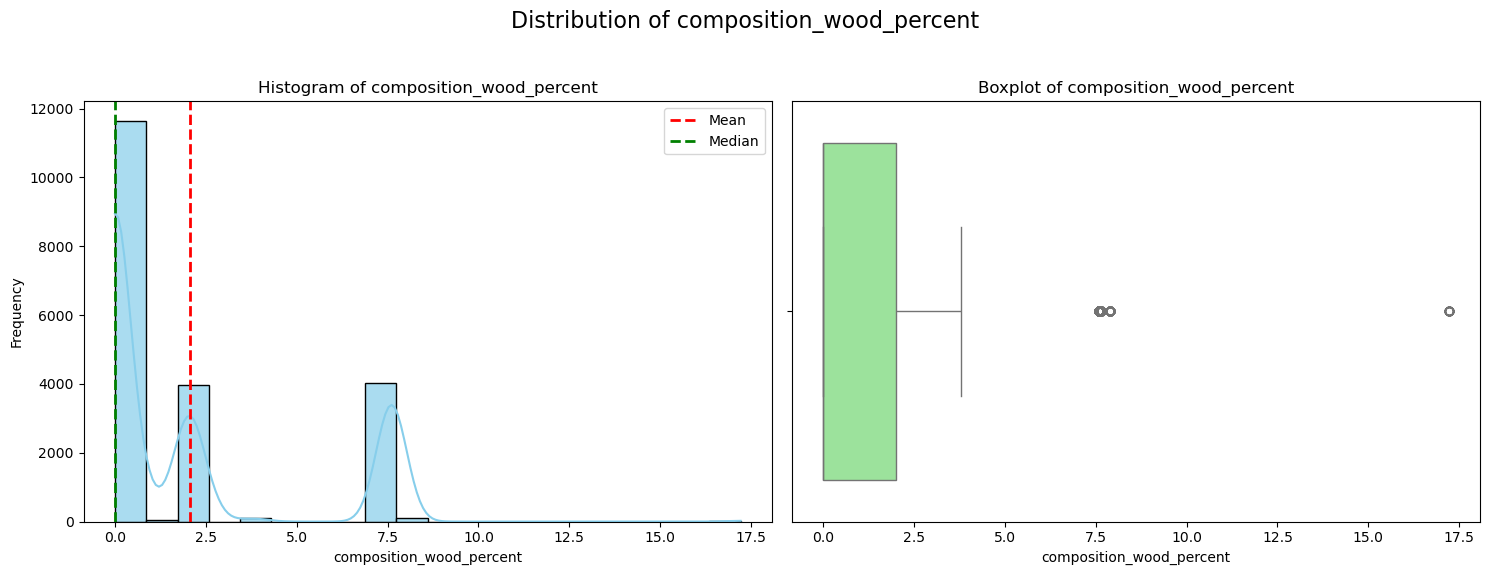

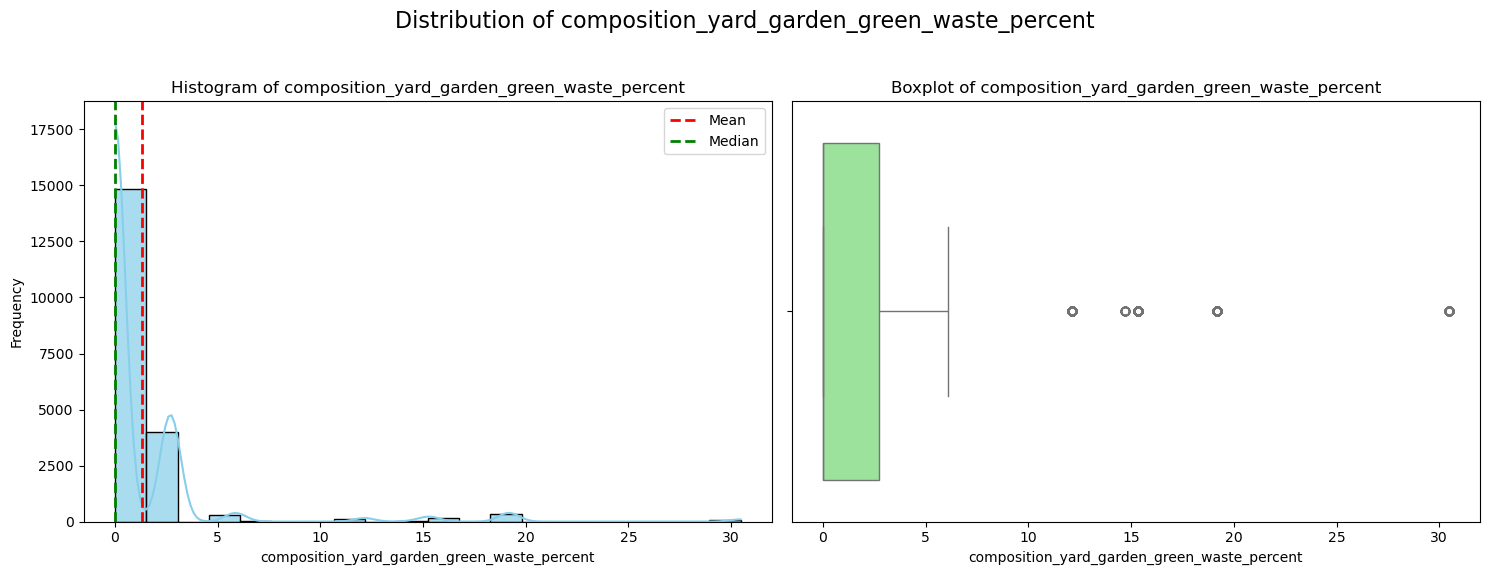

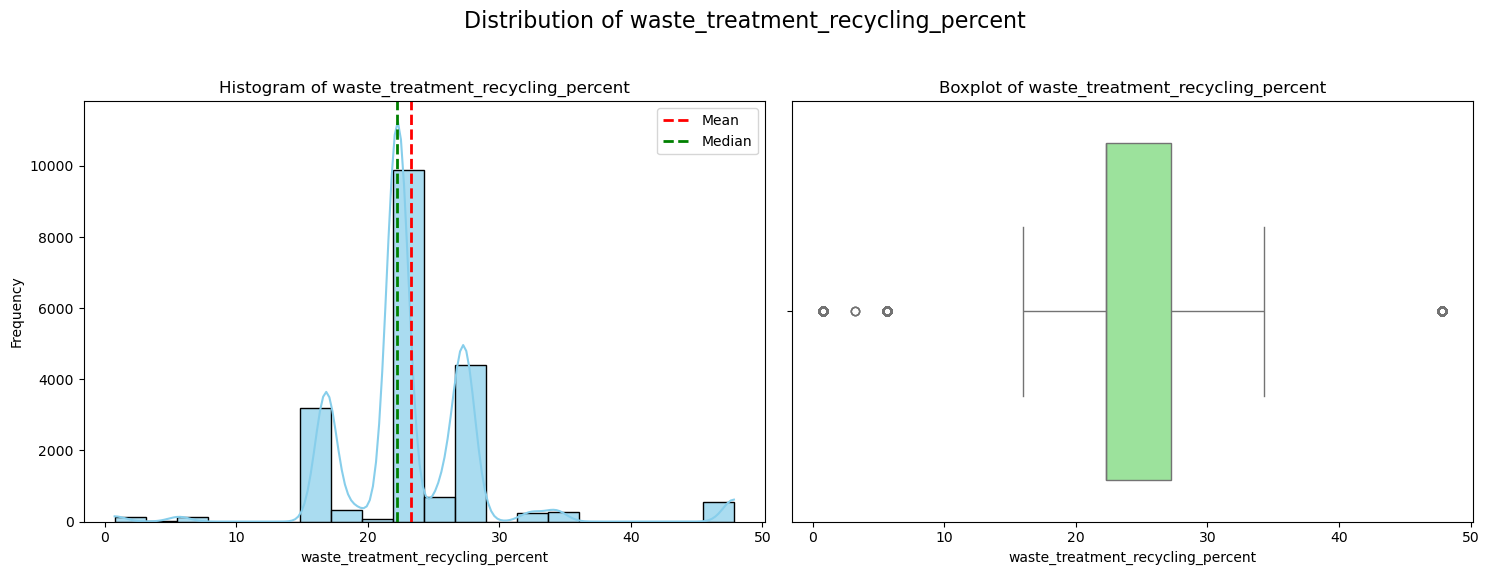

In [100]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist() # Automatically get numerical columns

def show_distribution(data, variable, title="Distribution of Variable"):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Increased figure size

    # Histogram
    sns.histplot(data, x=variable, color='skyblue', alpha=0.7, kde=True, bins=20, ax=axes[0]) # Adjusted colors, alpha, bins
    axes[0].set_title(f"Histogram of {variable}") # more descriptive title
    axes[0].set_ylabel("Frequency")
    axes[0].axvline(data[variable].mean(), color='red', linestyle='--', linewidth=2, label="Mean") # added label
    axes[0].axvline(data[variable].median(), color='green', linestyle='--', linewidth=2, label="Median") # added label
    axes[0].legend() #added legend

    # Boxplot
    sns.boxplot(data, x=variable, color='lightgreen', ax=axes[1]) # Adjusted color
    axes[1].set_title(f"Boxplot of {variable}") # more descriptive title
    axes[1].set_xlabel(variable)

    fig.suptitle(title, fontsize=16) #Added overall figure title.
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent overlapping titles and labels
    plt.show()

# Example usage (assuming 'clean_data' and 'numeric_features' are defined):
for col in numerical_features:
    show_distribution(df, col, title=f"Distribution of {col}")

Exploring Categorical Variables

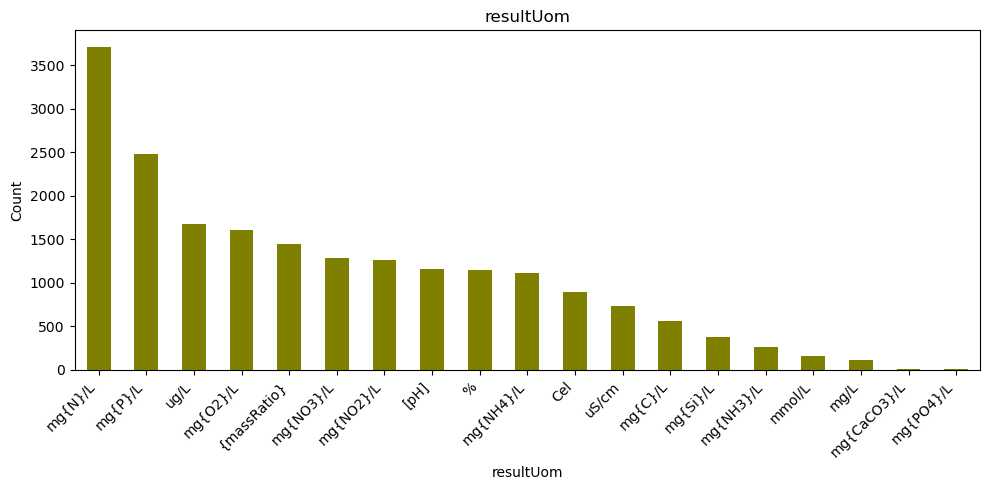

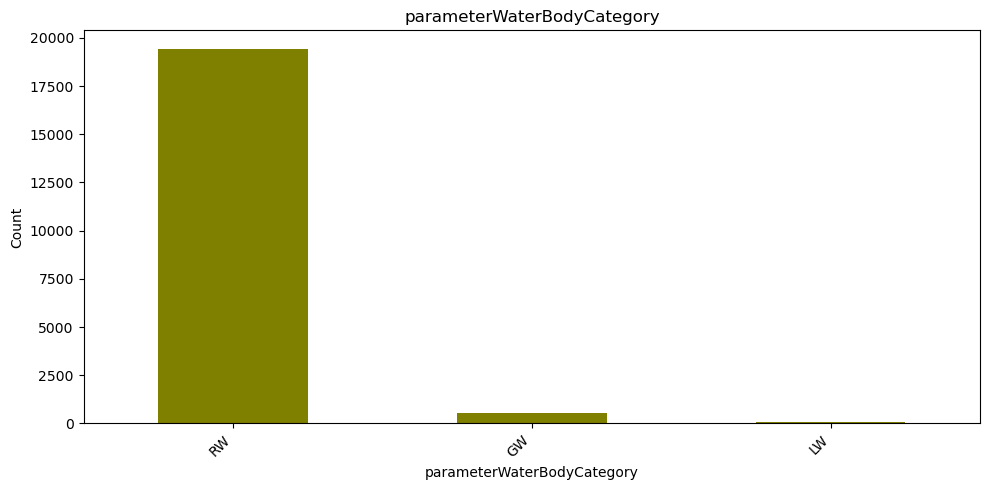

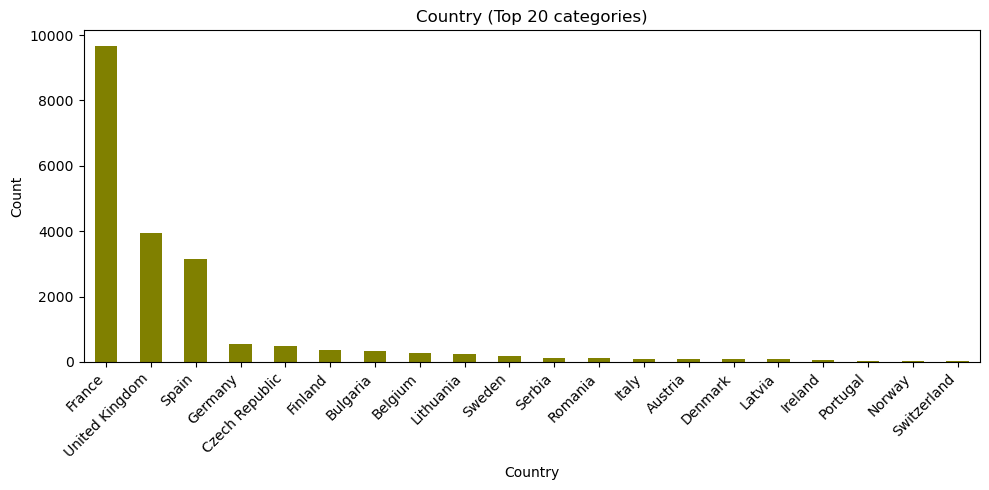

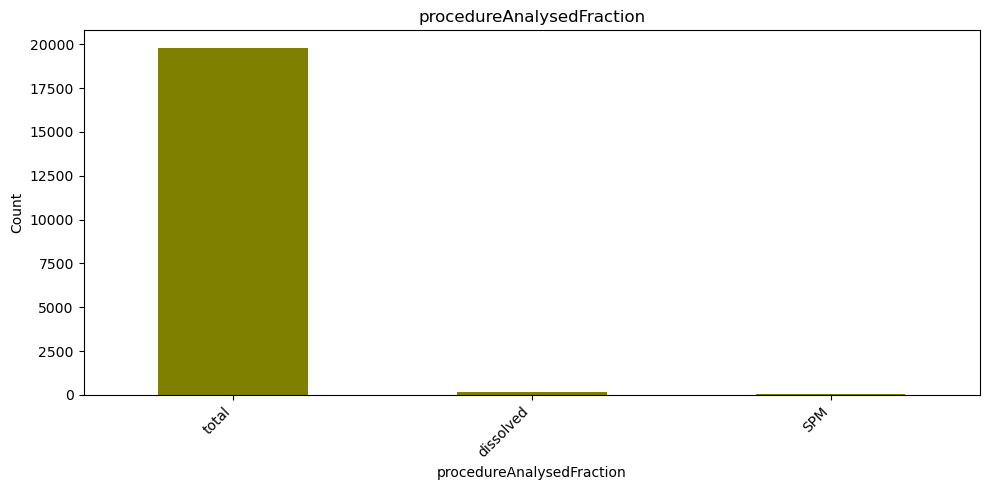

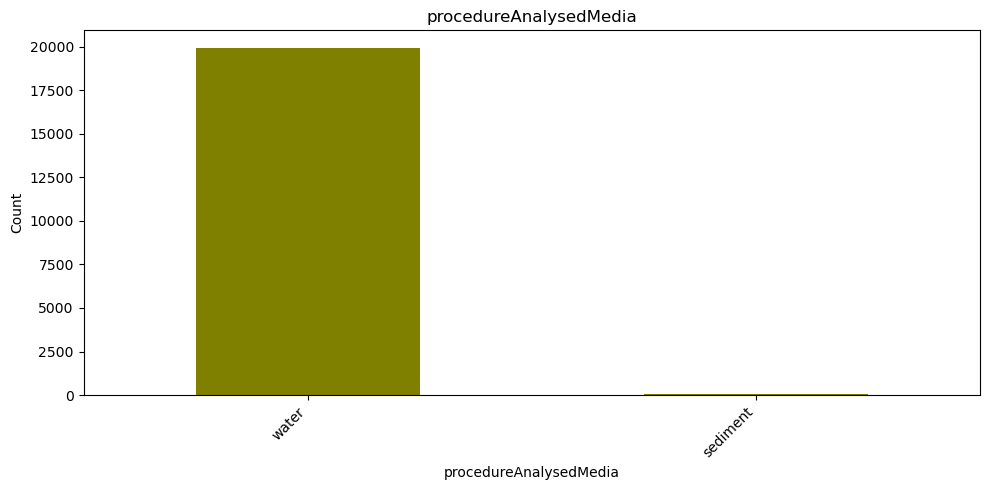

In [102]:
# Visualizing categorical feature distributions
def plot_category_distribution(column_name, max_labels=20):
    plt.figure(figsize=(10, 5))
    value_counts = df[column_name].value_counts()
    if len(value_counts) > max_labels:
        value_counts = value_counts[:max_labels]  # Display only top N categories
        title = f"{column_name} (Top {max_labels} categories)"
    else:
        title = column_name
    value_counts.plot(kind='bar', color='olive')
    plt.title(title)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Visualizing key categorical features
plot_category_distribution('resultUom')
plot_category_distribution('parameterWaterBodyCategory')
plot_category_distribution('Country') # , max_labels=20
plot_category_distribution('procedureAnalysedFraction')
plot_category_distribution('procedureAnalysedMedia')


**Step 2: Data Cleaning**

remove duplicated datas

In [104]:
# Remove duplicates (if any) and keep the first occurrence
df = df.drop_duplicates(keep='first')

# Display number of rows after removing duplicates
print(f"Number of rows after removing duplicates: {df.shape[0]}")


Number of rows after removing duplicates: 19921


Handling missing values

In [106]:
# Calculate the number of missing values in each column
missing_values_count = df.isnull().sum()

# Print the results
print("\nMissing values in each column:\n", missing_values_count)



Missing values in each column:
 parameterWaterBodyCategory                       0
observedPropertyDeterminandCode                  0
procedureAnalysedFraction                        0
procedureAnalysedMedia                           0
resultUom                                        0
phenomenonTimeReferenceYear                      0
parameterSamplingPeriod                          0
resultMeanValue                                  0
waterBodyIdentifier                              0
Country                                        104
PopulationDensity                              107
TerraMarineProtected_2016_2018                 107
TouristMean_1990_2020                          107
VenueCount                                       0
netMigration_2011_2018                         107
droughts_floods_temperature                    107
literacyRate_2010_2018                         107
combustibleRenewables_2009_2014                107
gdp                                            10

In [107]:
# ============================
# Data Cleaning - df_cleaned
# ============================
df_cleaned = df.copy()

# Handling Missing Data (using median for numerical columns)
for column in df_cleaned.select_dtypes(include=np.number).columns:
    if df_cleaned[column].isnull().any():
        median_val = df_cleaned[column].median()
        df_cleaned[column] = df_cleaned[column].fillna(median_val) # Direct assignment

# Verify the changes (Optional)
print("\nMissing values after handling:\n", df_cleaned.isnull().sum())



Missing values after handling:
 parameterWaterBodyCategory                       0
observedPropertyDeterminandCode                  0
procedureAnalysedFraction                        0
procedureAnalysedMedia                           0
resultUom                                        0
phenomenonTimeReferenceYear                      0
parameterSamplingPeriod                          0
resultMeanValue                                  0
waterBodyIdentifier                              0
Country                                        104
PopulationDensity                                0
TerraMarineProtected_2016_2018                   0
TouristMean_1990_2020                            0
VenueCount                                       0
netMigration_2011_2018                           0
droughts_floods_temperature                      0
literacyRate_2010_2018                           0
combustibleRenewables_2009_2014                  0
gdp                                              

Since we're left with Country, the feature waterBodyIdentifier's first 2 digit values starts with ISO code. we use this information to fill in the missing countries based on waterBodyIdentifier.

In [109]:
# Extract ISO country code from 'waterBodyIdentifier'
df_cleaned['ISO_Code'] = df_cleaned['waterBodyIdentifier'].str[:2]


In [110]:
iso_to_country = {
    'BE': 'Belgium', 'BG': 'Bulgaria', 'CZ': 'Czechia', 'DK': 'Denmark',
    'DE': 'Germany', 'EE': 'Estonia', 'IE': 'Ireland', 'EL': 'Greece',
    'ES': 'Spain', 'FR': 'France', 'HR': 'Croatia', 'IT': 'Italy',
    'CY': 'Cyprus', 'LV': 'Latvia', 'LT': 'Lithuania', 'LU': 'Luxembourg',
    'HU': 'Hungary', 'MT': 'Malta', 'NL': 'Netherlands', 'AT': 'Austria',
    'PL': 'Poland', 'PT': 'Portugal', 'RO': 'Romania', 'SI': 'Slovenia',
    'SK': 'Slovakia', 'FI': 'Finland', 'SE': 'Sweden', 'IS': 'Iceland',
    'LI': 'Liechtenstein', 'NO': 'Norway', 'UK': 'United Kingdom',
    'CH': 'Switzerland', 'GB': 'United Kingdom', 'US': 'United States'
}


In [111]:
# Fill missing 'Country' values using the mapping
df_cleaned['Country'] = df_cleaned['Country'].fillna(df_cleaned['ISO_Code'].map(iso_to_country))
print(df_cleaned['Country'].isnull().sum())

0



Missing Value Visualization (Matrix Plot):


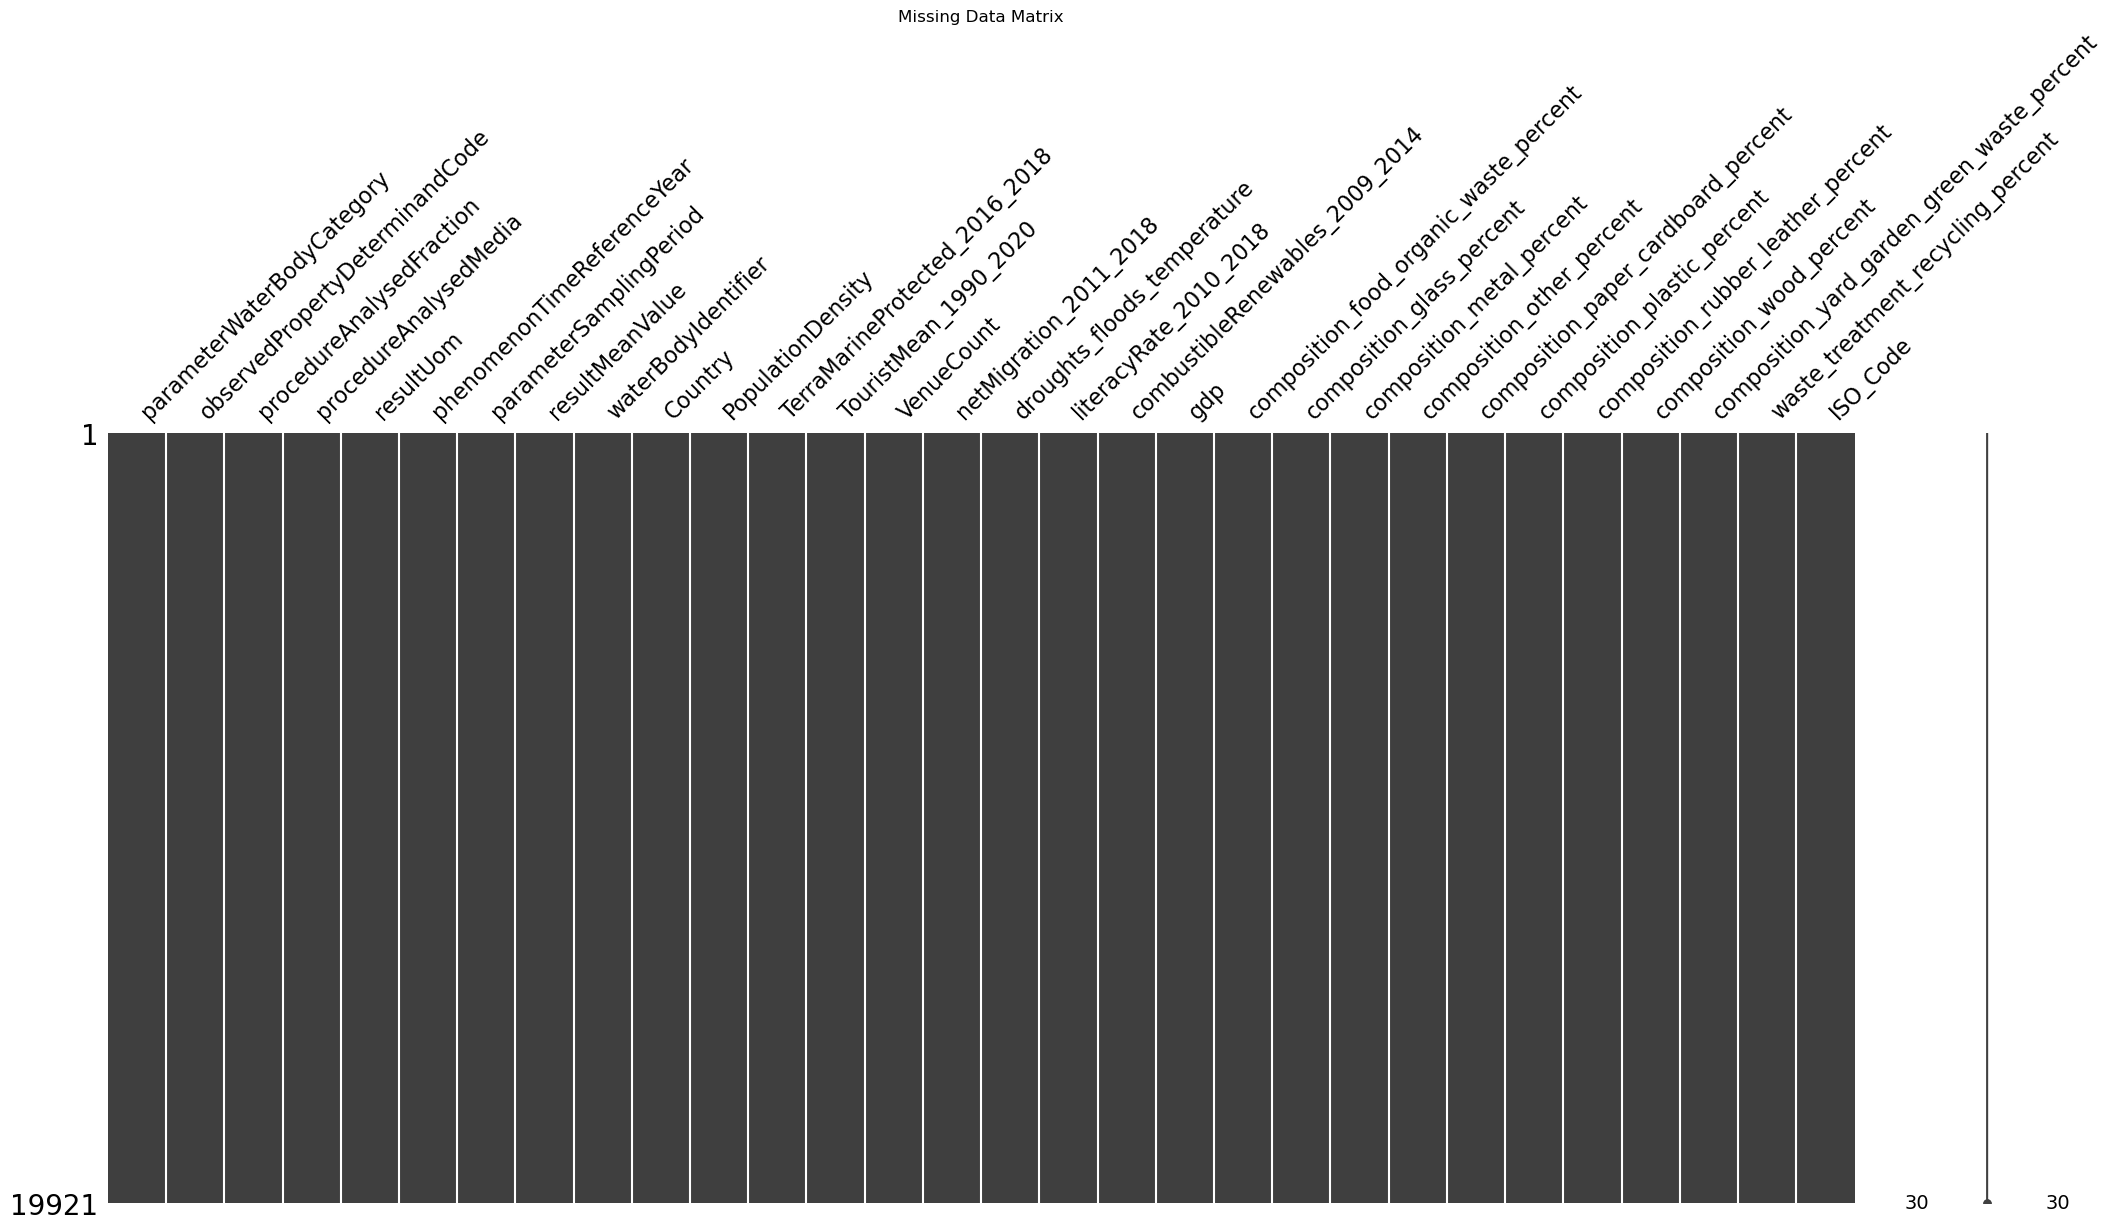


Missing values in each column:
 parameterWaterBodyCategory                     0
observedPropertyDeterminandCode                0
procedureAnalysedFraction                      0
procedureAnalysedMedia                         0
resultUom                                      0
phenomenonTimeReferenceYear                    0
parameterSamplingPeriod                        0
resultMeanValue                                0
waterBodyIdentifier                            0
Country                                        0
PopulationDensity                              0
TerraMarineProtected_2016_2018                 0
TouristMean_1990_2020                          0
VenueCount                                     0
netMigration_2011_2018                         0
droughts_floods_temperature                    0
literacyRate_2010_2018                         0
combustibleRenewables_2009_2014                0
gdp                                            0
composition_food_organic_waste_perce

In [112]:
print("\nMissing Value Visualization (Matrix Plot):")
msno.matrix(df_cleaned) # Matrix plot of missing values - visually identify patterns
plt.title('Missing Data Matrix')
plt.show()

# Calculate the number of missing values in each column
missing_values_count = df_cleaned.isnull().sum()

# Print the results
print("\nMissing values in each column:\n", missing_values_count)


**Step 3: outlier handling**

In [114]:
from scipy.stats import zscore, mstats

# Work on a copy
df_outlierhandling = df_cleaned.copy()

# List of composition features to clean
composition_cols = [
    'composition_food_organic_waste_percent',
    'composition_plastic_percent',
    'composition_metal_percent',
    'composition_yard_garden_green_waste_percent',
    'composition_wood_percent',
    'composition_paper_cardboard_percent',
    'composition_other_percent',
    'composition_glass_percent',
]

# 1. winsorizing (soft clipping without hard edges)
for col in composition_cols:
    df_outlierhandling[col] = mstats.winsorize(df_outlierhandling[col], limits=[0.01, 0.01])

# 2. Drop rows with extreme z-scores in any composition column
z_scores = df_outlierhandling[composition_cols].apply(zscore)
mask = (z_scores.abs() < 3).all(axis=1)
df_outlierhandling = df_outlierhandling[mask]

print(f"✅ Winsorized composition features. Rows after outlier filtering: {len(df_outlierhandling)}")


✅ Winsorized composition features. Rows after outlier filtering: 18135


dropping composition_rubber_leather_percent as most of the waterbodies contains 0%-1% of it, and this may not mean anything

In [116]:
# Drop the 'composition_rubber_leather_percent' column
df_outlierhandling = df_outlierhandling.drop(columns=['composition_rubber_leather_percent'])


Delete rows where 'composition_glass_percent' is greater than 20.0 (outlier)


In [118]:
df_outlierhandling = df_outlierhandling[df_outlierhandling['composition_glass_percent'] <= 20.0]

**Step 4: Data Transformation**r 


## numerical features

**Log Transformation**
   - resultMeanValue
   - combustableRenewables_2009_2014
   - PopulationDensity
   - gdp
   - TouristMean_1990_2020
   - VenueCount

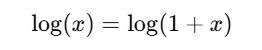

**Log Modulus (Signed log)**
- netMigration_2011_2018

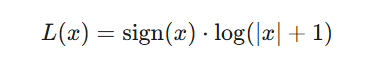

**Power Transformation (Yeo-Johnson)**
- literacyRate_2010_2018
- droughts_floods_temperature

In [122]:
import numpy as np
import pandas as pd
# Import the necessary transformer
from sklearn.preprocessing import PowerTransformer

# Assume df_outlierhandling is your DataFrame after handling outliers
# It should contain the original 'VenueCount', 'literacyRate_2010_2018',
# 'droughts_floods_temperature', and the other features to be transformed.

# Start from the outlier-handled DataFrame
df_transformed = df_outlierhandling.copy()

# Keep track of original columns to drop later
original_cols_to_drop = []

# ----------------------------
# Regular Log Transform (np.log1p)
# ----------------------------
log_features = [
    'resultMeanValue',
    'combustibleRenewables_2009_2014',
    'PopulationDensity',
    'gdp',
    'TouristMean_1990_2020',
    'VenueCount' # Apply log1p to VenueCount as discussed
]

print("Applying log1p transform to:")
for col in log_features:
    if col in df_transformed.columns:
        df_transformed[f"{col}_log1p"] = np.log1p(df_transformed[col])
        original_cols_to_drop.append(col)
        print(f"- {col}")
    else:
        print(f"- WARNING: Column '{col}' not found for log1p transform.")

# ----------------------------
# Log Modulus Transform (for features potentially with negative values)
# ----------------------------
def log_modulus(x):
    # Check for NaN explicitly before applying abs()
    if pd.isnull(x):
        return np.nan
    return np.sign(x) * np.log1p(abs(x))

log_modulus_features = ['netMigration_2011_2018']

print("\nApplying log modulus transform to:")
for col in log_modulus_features:
    if col in df_transformed.columns:
        df_transformed[f"{col}_logmod"] = df_transformed[col].apply(log_modulus)
        original_cols_to_drop.append(col)
        print(f"- {col}")
    else:
        print(f"- WARNING: Column '{col}' not found for log modulus transform.")

# ----------------------------
# Yeo-Johnson Transform (for skewed/bimodal features like literacy, droughts)
# ----------------------------
yeo_johnson_features = [
    'literacyRate_2010_2018',
    'droughts_floods_temperature'
]

print("\nApplying Yeo-Johnson transform to:")
for col in yeo_johnson_features:
    if col in df_transformed.columns:
        # Reshape data for PowerTransformer (expects 2D array)
        feature_data = df_transformed[[col]].dropna() # Drop NaN before fitting!
        if not feature_data.empty:
            pt = PowerTransformer(method='yeo-johnson')
            # Fit and transform on non-NaN data
            transformed_data = pt.fit_transform(feature_data)

            # Create the new column name
            new_col_name = f"{col}_yj"
            # Assign back to the original DataFrame using index alignment
            df_transformed[new_col_name] = pd.Series(transformed_data.flatten(), index=feature_data.index)
            original_cols_to_drop.append(col)
            print(f"- {col}")
        else:
            print(f"- WARNING: Column '{col}' contains only NaNs or is empty. Skipping Yeo-Johnson.")
            # Optionally create an empty column or handle as needed
            df_transformed[f"{col}_yj"] = np.nan
    else:
        print(f"- WARNING: Column '{col}' not found for Yeo-Johnson transform.")

# ----------------------------
# Drop Original Columns that were transformed
# ----------------------------
# Use list(set(...)) to ensure unique column names if any were listed multiple times
cols_to_drop_unique = list(set(original_cols_to_drop))
# Check which columns actually exist before dropping
cols_to_drop_existing = [col for col in cols_to_drop_unique if col in df_transformed.columns]

if cols_to_drop_existing:
    print(f"\nDropping original columns that were transformed: {cols_to_drop_existing}")
    # Create a new df by dropping columns, safer than inplace=True sometimes
    df_final_transformed = df_transformed.drop(columns=cols_to_drop_existing)
else:
    print("\nNo original columns found to drop.")
    df_final_transformed = df_transformed.copy() # Keep working with df_final_transformed

# ----------------------------
# Drop rows with NaNs in ANY of the newly transformed features
# ----------------------------
# Define all the NEW column names created by the transforms
transformed_columns = [f"{col}_log1p" for col in log_features if f"{col}_log1p" in df_final_transformed.columns] + \
                      [f"{col}_logmod" for col in log_modulus_features if f"{col}_logmod" in df_final_transformed.columns] + \
                      [f"{col}_yj" for col in yeo_johnson_features if f"{col}_yj" in df_final_transformed.columns]

print(f"\nChecking for NaNs in columns: {transformed_columns}")

# Keep track of original size before dropping NaNs based on transformed columns
rows_before_nan_drop = len(df_final_transformed)

# Drop rows where ANY of the transformed columns have NaN
df_transformed_cleaned = df_final_transformed.dropna(subset=transformed_columns).copy()

rows_after_nan_drop = len(df_transformed_cleaned)
rows_dropped = rows_before_nan_drop - rows_after_nan_drop

print(f"\n✅ Applied transformations. Dropped {rows_dropped} rows due to NaNs in transformed columns.")
print(f"Final DataFrame shape after transformations and NaN removal: {df_transformed_cleaned.shape}")

# Display the first few rows of the final cleaned DataFrame
print("\nFirst 5 rows of the cleaned transformed data:")
print(df_transformed_cleaned.head())

# Display remaining columns
print("\nColumns in the final cleaned DataFrame:")
print(df_transformed_cleaned.columns)

Applying log1p transform to:
- resultMeanValue
- combustibleRenewables_2009_2014
- PopulationDensity
- gdp
- TouristMean_1990_2020
- VenueCount

Applying log modulus transform to:
- netMigration_2011_2018

Applying Yeo-Johnson transform to:
- literacyRate_2010_2018
- droughts_floods_temperature

Dropping original columns that were transformed: ['combustibleRenewables_2009_2014', 'netMigration_2011_2018', 'literacyRate_2010_2018', 'PopulationDensity', 'resultMeanValue', 'droughts_floods_temperature', 'gdp', 'VenueCount', 'TouristMean_1990_2020']

Checking for NaNs in columns: ['resultMeanValue_log1p', 'combustibleRenewables_2009_2014_log1p', 'PopulationDensity_log1p', 'gdp_log1p', 'TouristMean_1990_2020_log1p', 'VenueCount_log1p', 'netMigration_2011_2018_logmod', 'literacyRate_2010_2018_yj', 'droughts_floods_temperature_yj']

✅ Applied transformations. Dropped 0 rows due to NaNs in transformed columns.
Final DataFrame shape after transformations and NaN removal: (18135, 29)

First 5 row

In [124]:
df_transformed.head()

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent,ISO_Code,resultMeanValue_log1p,combustibleRenewables_2009_2014_log1p,PopulationDensity_log1p,gdp_log1p,TouristMean_1990_2020_log1p,VenueCount_log1p,netMigration_2011_2018_logmod,literacyRate_2010_2018_yj,droughts_floods_temperature_yj
0,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.063310,FRDR609,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,FR,0.061387,1.697053,4.814616,28.662794,18.080671,0.000000,11.235977,-0.483904,-0.632029
1,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.046733,FRFR238,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,FR,0.045674,1.697053,4.814616,28.662794,18.080671,0.000000,11.235977,-0.483904,-0.632029
2,RW,EEA_3164-07-6,total,water,{massRatio},2009,2009-01--2009-12,132.859000,FRFR238,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,FR,4.896787,1.697053,4.814616,28.662794,18.080671,0.000000,11.235977,-0.483904,-0.632029
3,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,2009-01--2009-12,11.578376,FRFR327C,France,122.299437,30.831906,71176346.0,2.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,FR,2.531979,1.697053,4.814616,28.662794,18.080671,1.098612,11.235977,-0.483904,-0.632029
4,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,0.206800,ES014MSPFES-014-NR-038-000-02-02,Spain,93.677197,15.047884,50941692.0,4.0,-40055.250,0.729194,87.158924,4.363288,1.464509e+12,49.0,8.0,3.0,14.0,15.0,9.0,2.0,0.0,16.84,ES,0.187972,1.679577,4.550473,28.012541,17.746192,1.609438,-10.598040,2.071664,2.105301


since parameterSamplingPeriod is a range, we convert it to a more meaningful features, which are:
- Start_Year
- End_Year
- Sampling_Duration_In_Year 

In [126]:
# Clean spaces and invalid formats
df_transformed['parameterSamplingPeriod'] = df_transformed['parameterSamplingPeriod'].str.strip()

# Split the range into Start and End Year
df_transformed[['Start_Year', 'End_Year']] = df_transformed['parameterSamplingPeriod'].str.split('--', expand=True)

# Correct date parsing
df_transformed['Start_Year'] = pd.to_datetime(df_transformed['Start_Year'], format='%Y-%m', errors='coerce').dt.year
df_transformed['End_Year'] = pd.to_datetime(df_transformed['End_Year'], format='%Y-%m', errors='coerce').dt.year

# Correct fill for missing Start/End Years
df_transformed[['Start_Year', 'End_Year']] = df_transformed[['Start_Year', 'End_Year']].fillna(
    {'Start_Year': df_transformed['phenomenonTimeReferenceYear'],
     'End_Year': df_transformed['phenomenonTimeReferenceYear']}
)

# Remove .0 by converting to integers
df_transformed['Start_Year'] = df_transformed['Start_Year'].astype(int)
df_transformed['End_Year'] = df_transformed['End_Year'].astype(int)

# Sampling Duration Calculation
df_transformed['Sampling_Duration_In_Year'] = df_transformed['End_Year'] - df_transformed['Start_Year'] + 1


In [127]:
df_transformed.head()

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent,ISO_Code,resultMeanValue_log1p,combustibleRenewables_2009_2014_log1p,PopulationDensity_log1p,gdp_log1p,TouristMean_1990_2020_log1p,VenueCount_log1p,netMigration_2011_2018_logmod,literacyRate_2010_2018_yj,droughts_floods_temperature_yj,Start_Year,End_Year,Sampling_Duration_In_Year
0,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.063310,FRDR609,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,FR,0.061387,1.697053,4.814616,28.662794,18.080671,0.000000,11.235977,-0.483904,-0.632029,2009,2009,1
1,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.046733,FRFR238,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,FR,0.045674,1.697053,4.814616,28.662794,18.080671,0.000000,11.235977,-0.483904,-0.632029,2009,2009,1
2,RW,EEA_3164-07-6,total,water,{massRatio},2009,2009-01--2009-12,132.859000,FRFR238,France,122.299437,30.831906,71176346.0,0.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,FR,4.896787,1.697053,4.814616,28.662794,18.080671,0.000000,11.235977,-0.483904,-0.632029,2009,2009,1
3,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,2009-01--2009-12,11.578376,FRFR327C,France,122.299437,30.831906,71176346.0,2.0,75808.375,0.005718,0.000000,4.457840,2.806036e+12,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,FR,2.531979,1.697053,4.814616,28.662794,18.080671,1.098612,11.235977,-0.483904,-0.632029,2009,2009,1
4,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,0.206800,ES014MSPFES-014-NR-038-000-02-02,Spain,93.677197,15.047884,50941692.0,4.0,-40055.250,0.729194,87.158924,4.363288,1.464509e+12,49.0,8.0,3.0,14.0,15.0,9.0,2.0,0.0,16.84,ES,0.187972,1.679577,4.550473,28.012541,17.746192,1.609438,-10.598040,2.071664,2.105301,2009,2009,1


## categorical features

**Transform values to proper naming:**
- resultUom

In [130]:
unique_result_uom = df_transformed['resultUom'].unique()
unique_result_uom


array(['mg{NO2}/L', '{massRatio}', 'mg{NO3}/L', 'mmol/L', 'mg{P}/L', '%',
       'mg{N}/L', '[pH]', 'mg{Si}/L', 'mg{O2}/L', 'mg{NH4}/L', 'ug/L',
       'uS/cm', 'mg/L', 'Cel', 'mg{C}/L', 'mg{NH3}/L', 'mg{PO4}/L',
       'mg{CaCO3}/L'], dtype=object)

In [131]:
import pandas as pd

# Define a dictionary mapping encoded units to descriptions
unit_description_mapping = {
    'mg{NO2}/L': 'Nitrite (mg/L)',
    '{massRatio}': 'Mass Ratio',
    'mg{NO3}/L': 'Nitrate (mg/L)',
    'mmol/L': 'Millimoles per Liter',
    'mg{P}/L': 'Phosphorus (mg/L)',
    '%': 'Percentage (%)',
    'mg{N}/L': 'Nitrogen (mg/L)',
    '[pH]': 'pH',
    'mg{Si}/L': 'Silicon (mg/L)',
    'mg{O2}/L': 'Dissolved Oxygen (mg/L)',
    'mg{NH4}/L': 'Ammonium (mg/L)',
    'ug/L': 'Micrograms per Liter',
    'uS/cm': 'MicroSiemens per Centimeter (Conductivity)',
    'mg/L': 'Milligrams per Liter',
    'Cel': 'Degrees Celsius (Temperature)',
    'mg{C}/L': 'Carbon (mg/L)',
    'mg{NH3}/L': 'Ammonia (mg/L)',
    'mg{PO4}/L': 'Phosphate (mg/L)',
    'mg{CaCO3}/L': 'Calcium Carbonate (mg/L)'
}

# Apply the mapping to the 'resultUom_TargetEnc' column to replace encoded values with descriptions
df_transformed['resultUom_Desc'] = df_transformed['resultUom'].map(unit_description_mapping)

# To keep both, just comment out the lines above.  It might be good to keep both initially for reference.
print(df_transformed[['resultUom', 'resultUom_Desc']].drop_duplicates())

        resultUom                              resultUom_Desc
0       mg{NO2}/L                              Nitrite (mg/L)
2     {massRatio}                                  Mass Ratio
3       mg{NO3}/L                              Nitrate (mg/L)
4          mmol/L                        Millimoles per Liter
6         mg{P}/L                           Phosphorus (mg/L)
8               %                              Percentage (%)
11        mg{N}/L                             Nitrogen (mg/L)
13           [pH]                                          pH
14       mg{Si}/L                              Silicon (mg/L)
16       mg{O2}/L                     Dissolved Oxygen (mg/L)
22      mg{NH4}/L                             Ammonium (mg/L)
25           ug/L                        Micrograms per Liter
26          uS/cm  MicroSiemens per Centimeter (Conductivity)
40           mg/L                        Milligrams per Liter
51            Cel               Degrees Celsius (Temperature)
207     

**Step 5: Select all related features and drop redundant features**

In [133]:
print(df_transformed.info())  # Check data types, non-null values, memory usage


<class 'pandas.core.frame.DataFrame'>
Index: 18135 entries, 0 to 19999
Data columns (total 42 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   parameterWaterBodyCategory                   18135 non-null  object 
 1   observedPropertyDeterminandCode              18135 non-null  object 
 2   procedureAnalysedFraction                    18135 non-null  object 
 3   procedureAnalysedMedia                       18135 non-null  object 
 4   resultUom                                    18135 non-null  object 
 5   phenomenonTimeReferenceYear                  18135 non-null  int64  
 6   parameterSamplingPeriod                      18135 non-null  object 
 7   resultMeanValue                              18135 non-null  float64
 8   waterBodyIdentifier                          18135 non-null  object 
 9   Country                                      18135 non-null  object 
 10  Pop

In [134]:
from sklearn.model_selection import train_test_split

columns_to_drop = [
    'resultUom',
    'resultMeanValue', 
    'PopulationDensity',
    'combustibleRenewables_2009_2014',
    'gdp', 
    'netMigration_2011_2018',  
    'phenomenonTimeReferenceYear', 
    'parameterSamplingPeriod', 
    'ISO_Code',
    'TouristMean_1990_2020',
    'VenueCount',
    'literacyRate_2010_2018',
    'droughts_floods_temperature',
    'literacyRate_2010_2018_yj'
]

df_final = df_transformed.drop(columns=columns_to_drop, errors='ignore')

In [135]:
print(df_final.info())  # Check data types, non-null values, memory usage

<class 'pandas.core.frame.DataFrame'>
Index: 18135 entries, 0 to 19999
Data columns (total 28 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   parameterWaterBodyCategory                   18135 non-null  object 
 1   observedPropertyDeterminandCode              18135 non-null  object 
 2   procedureAnalysedFraction                    18135 non-null  object 
 3   procedureAnalysedMedia                       18135 non-null  object 
 4   waterBodyIdentifier                          18135 non-null  object 
 5   Country                                      18135 non-null  object 
 6   TerraMarineProtected_2016_2018               18135 non-null  float64
 7   composition_food_organic_waste_percent       18135 non-null  float64
 8   composition_glass_percent                    18135 non-null  float64
 9   composition_metal_percent                    18135 non-null  float64
 10  com

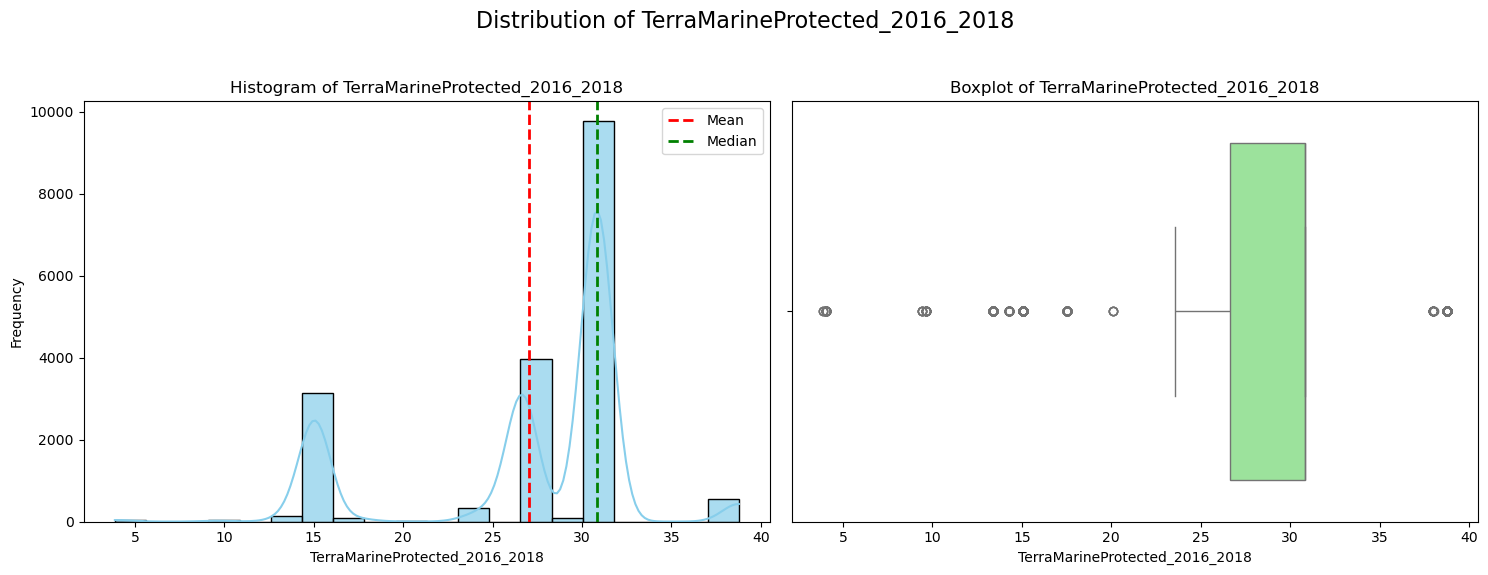

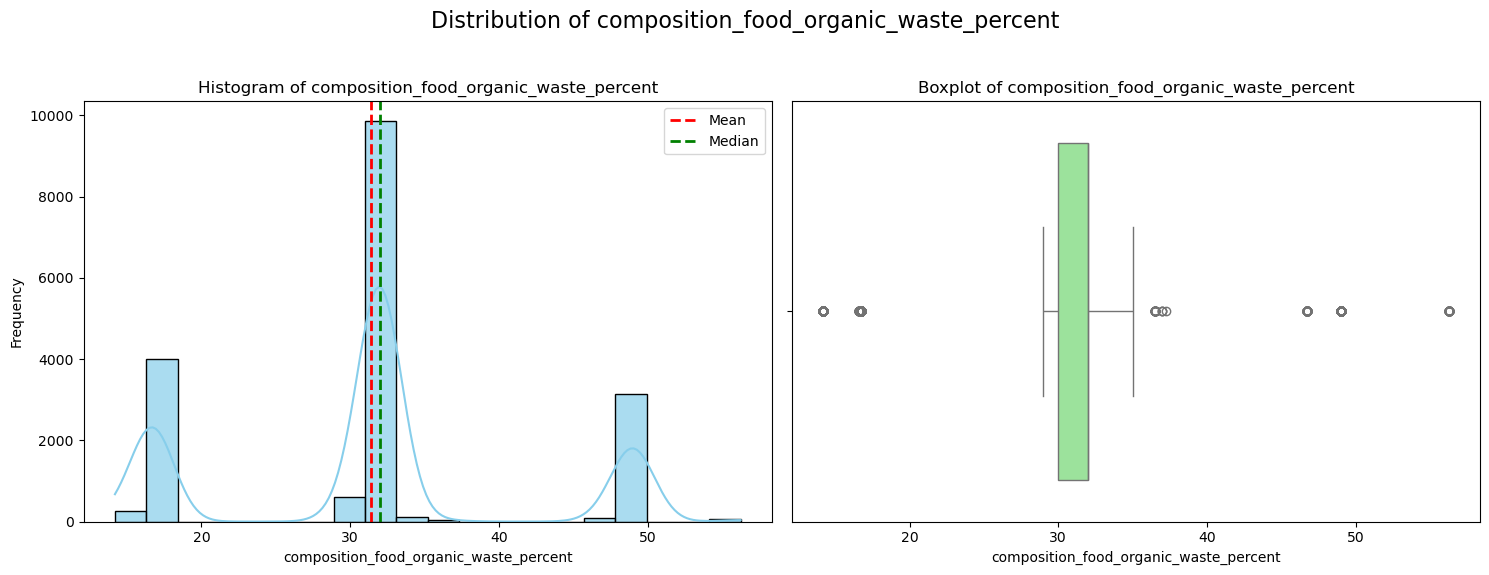

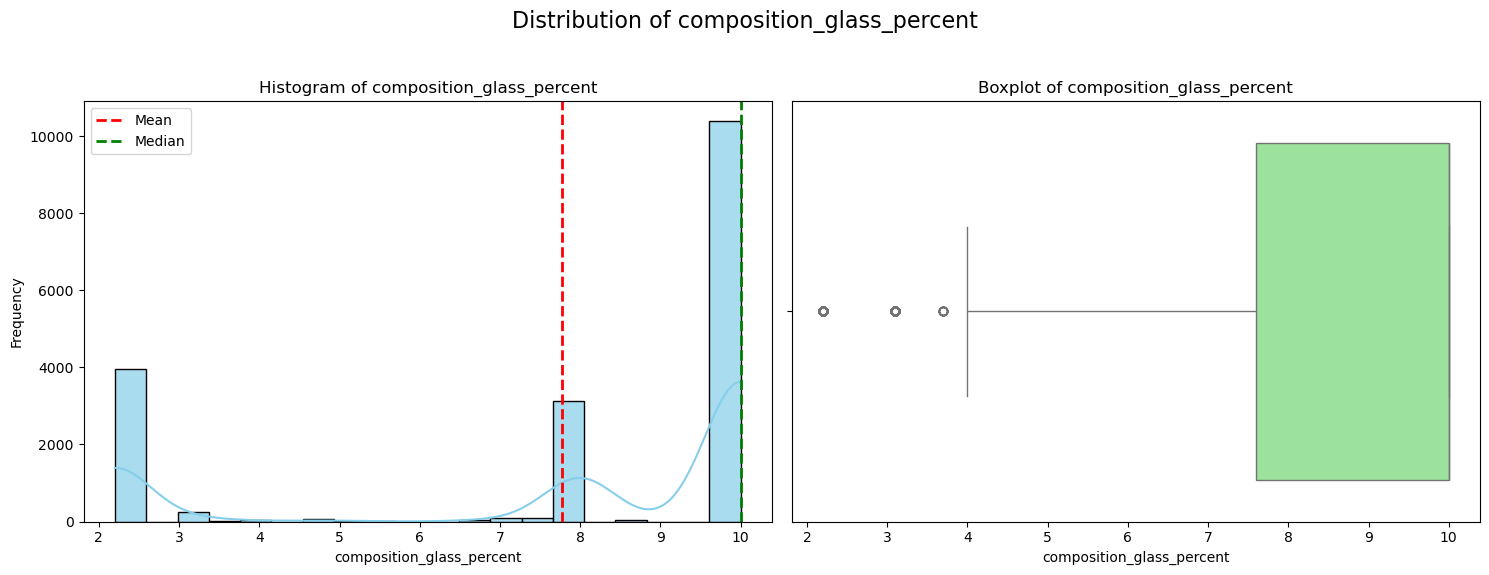

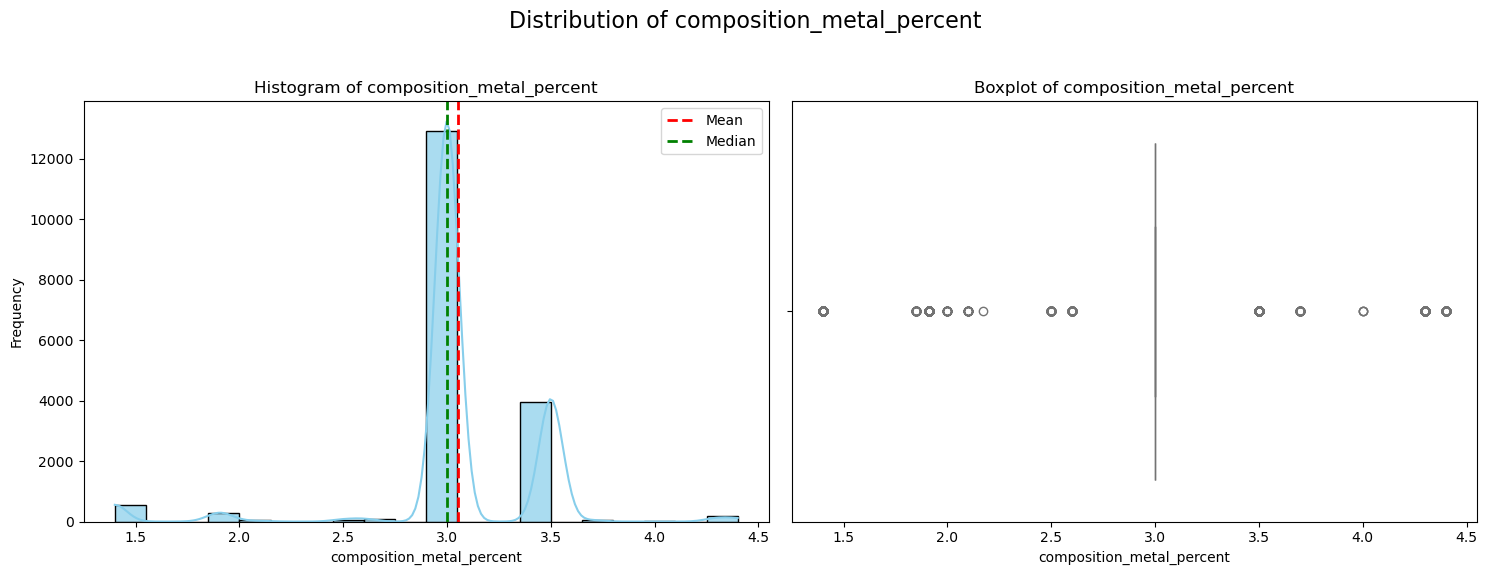

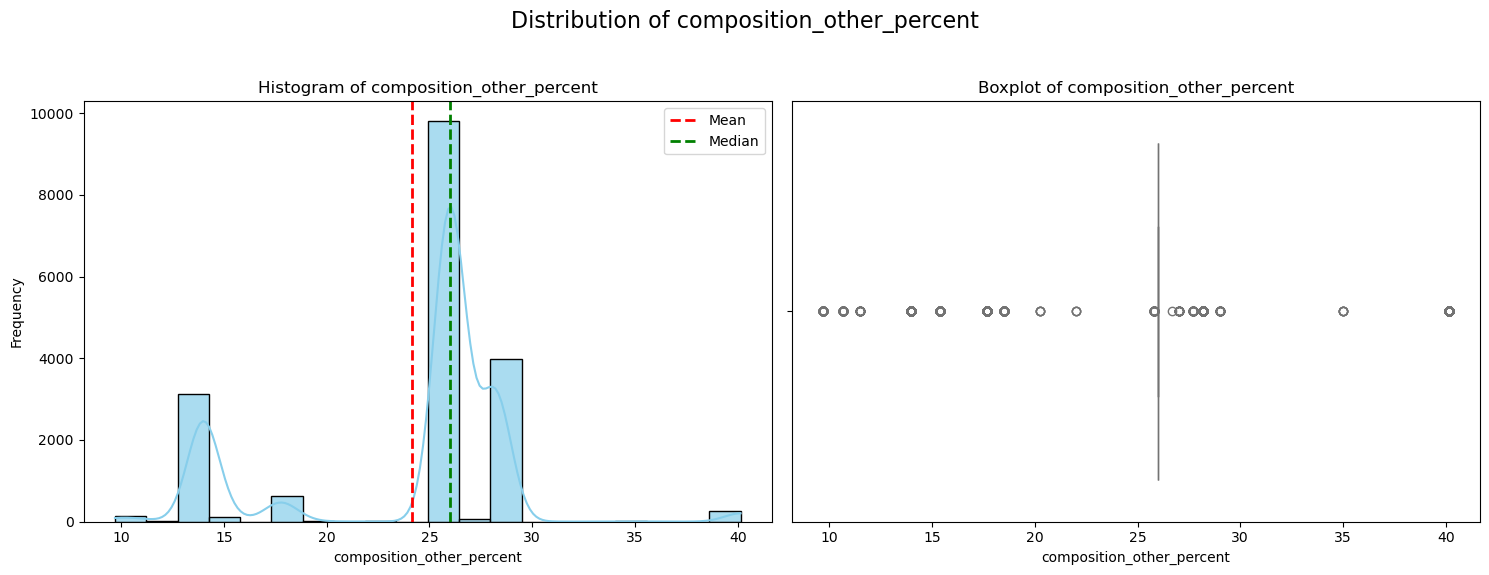

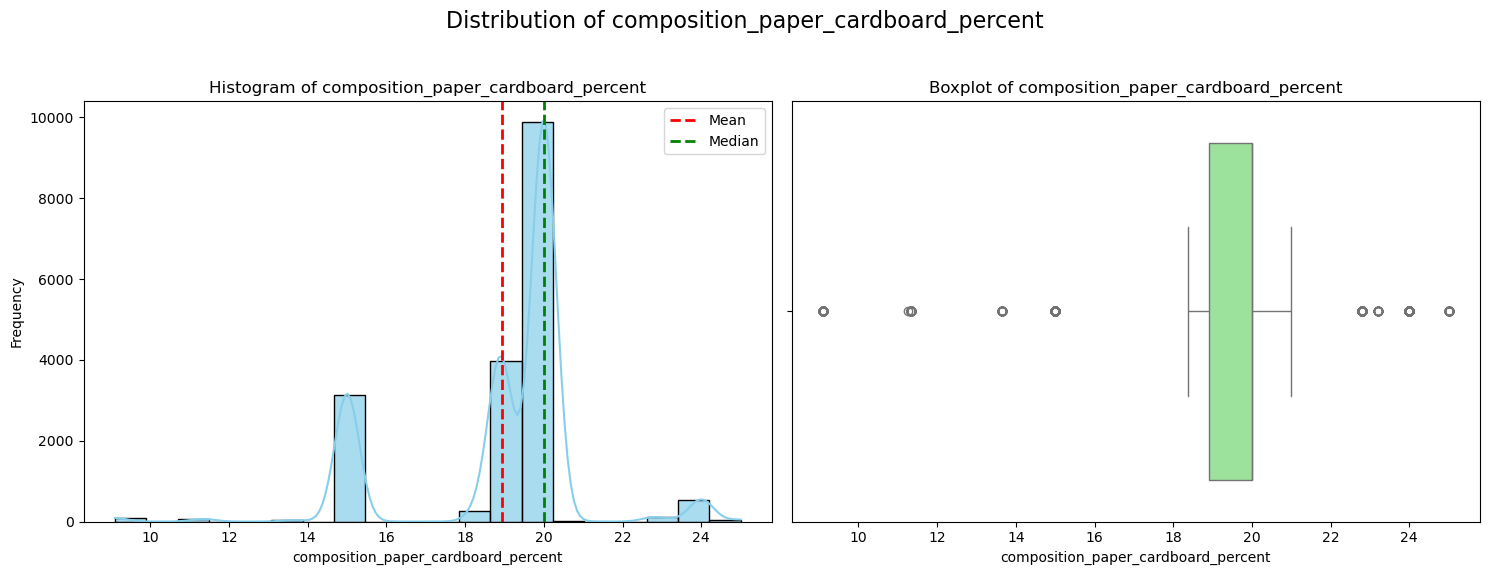

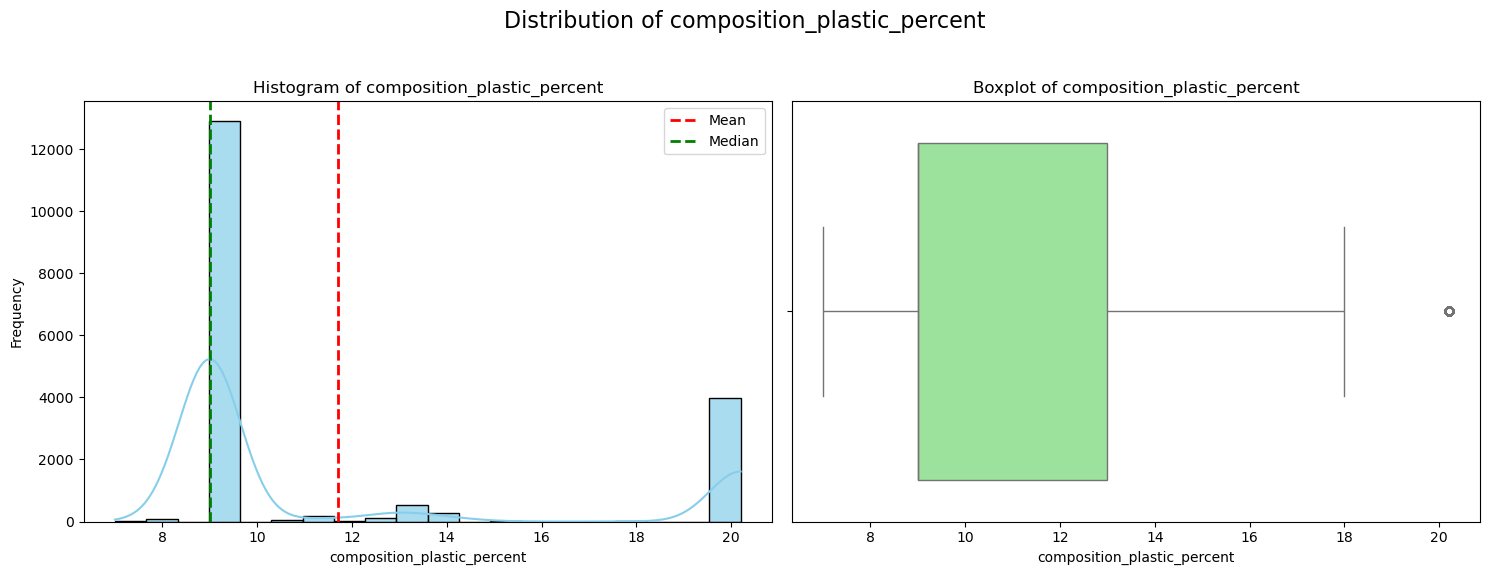

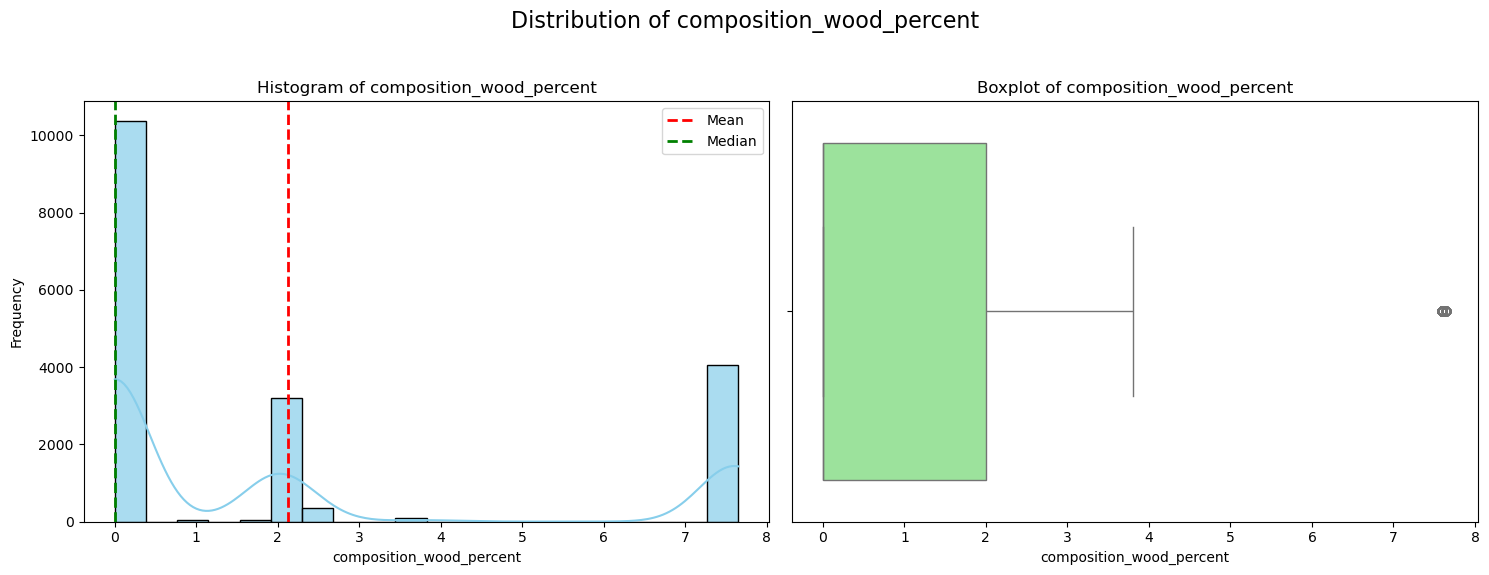

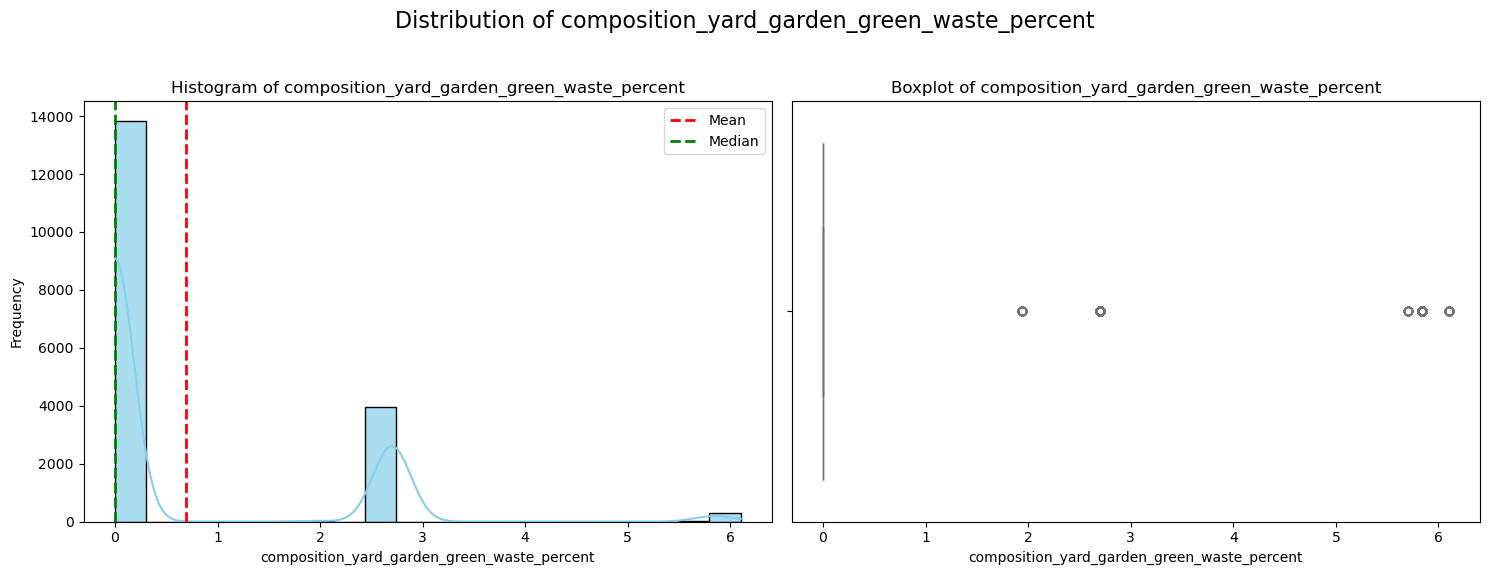

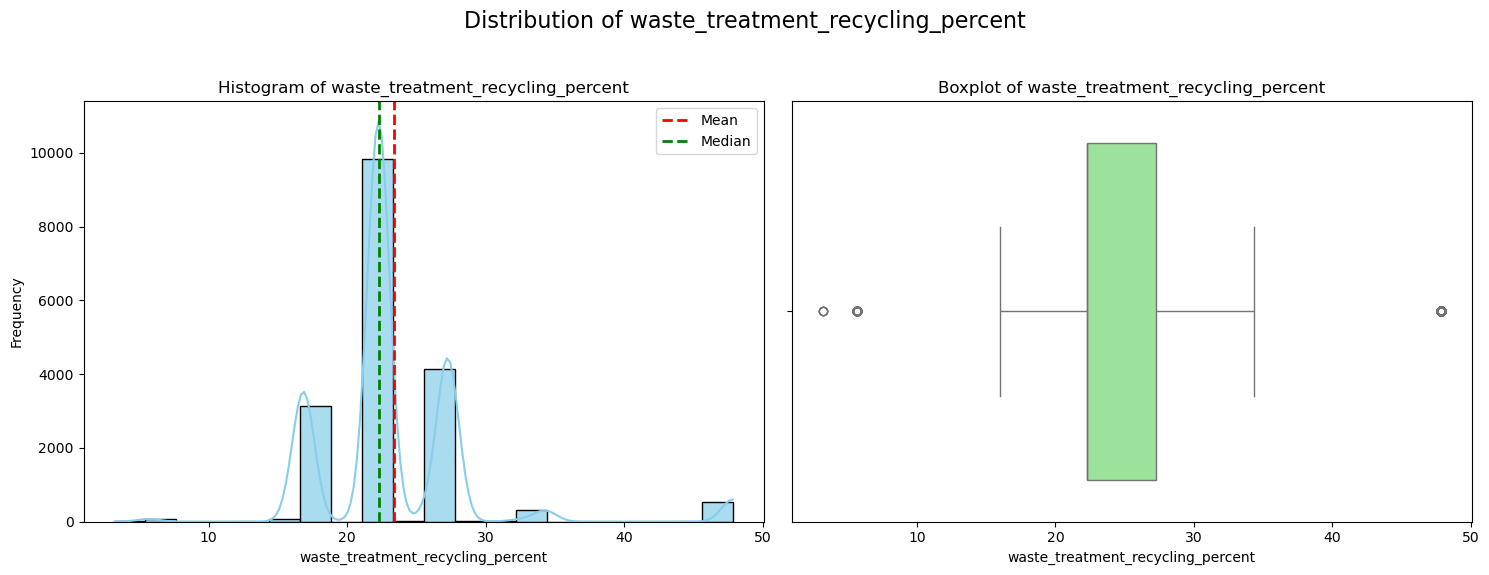

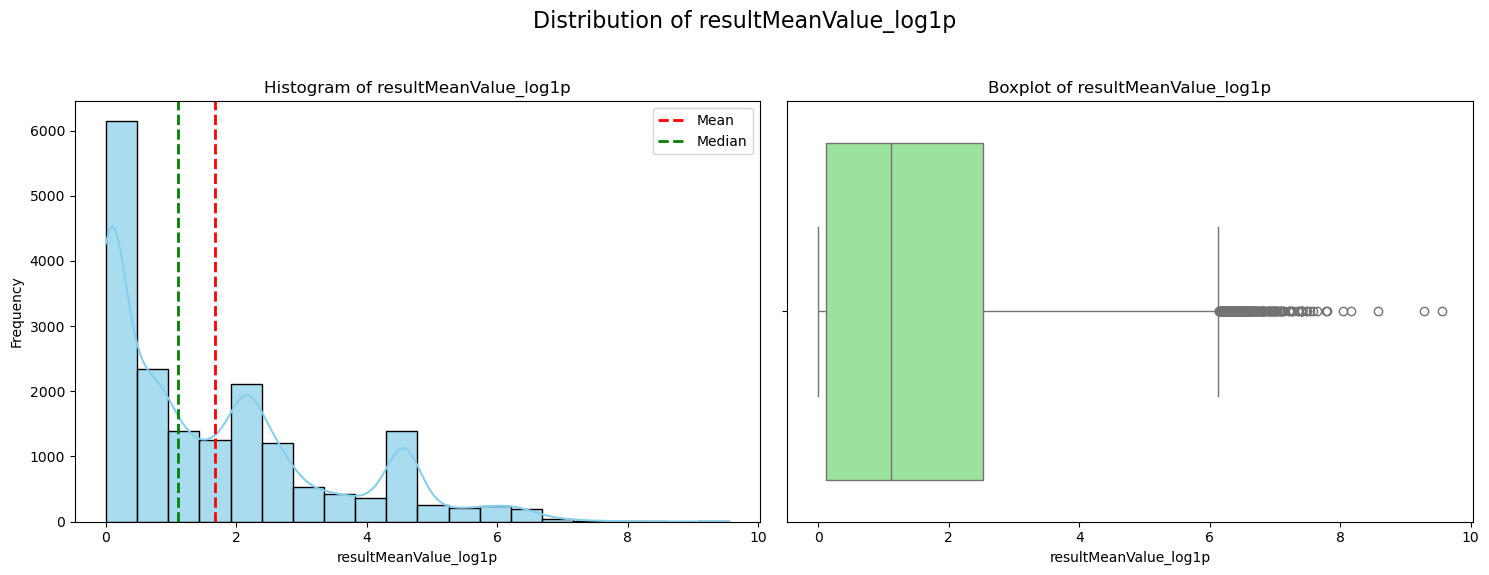

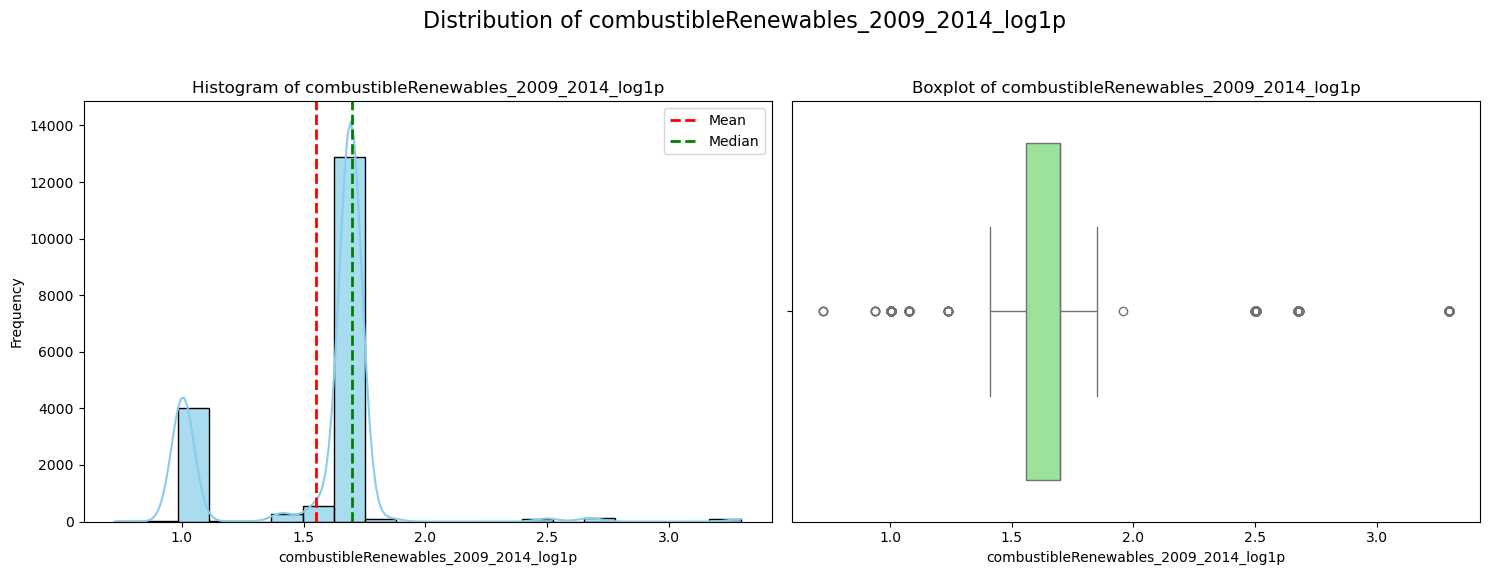

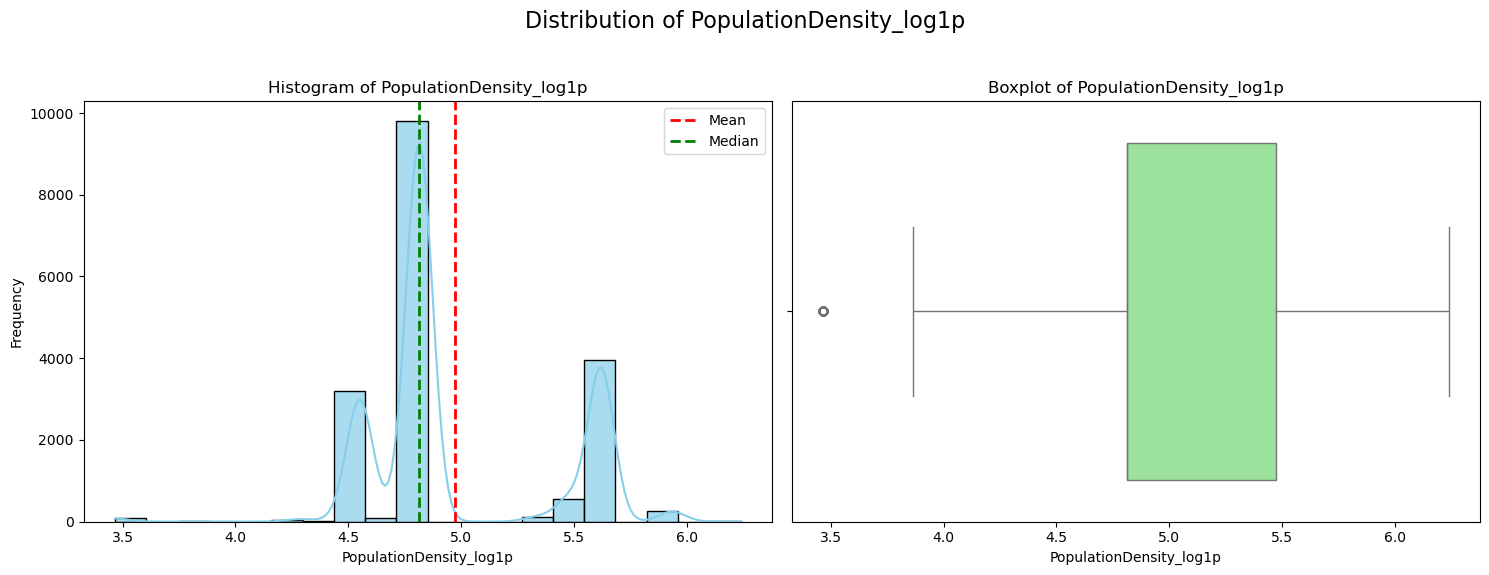

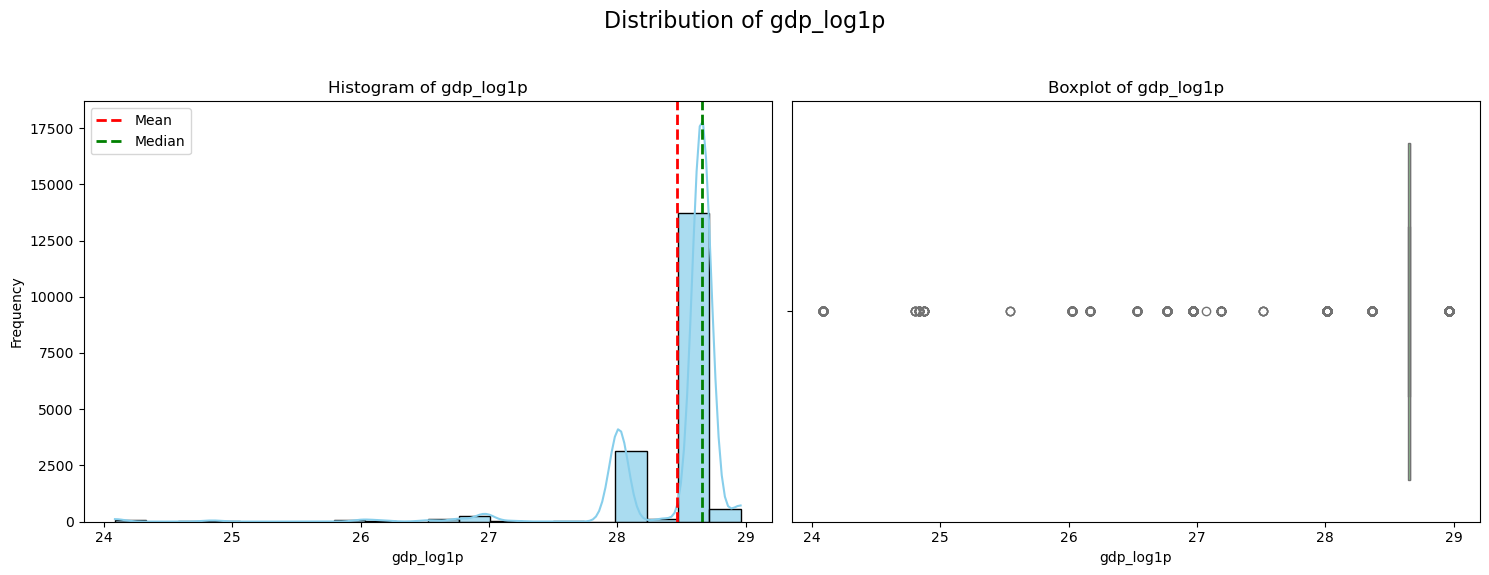

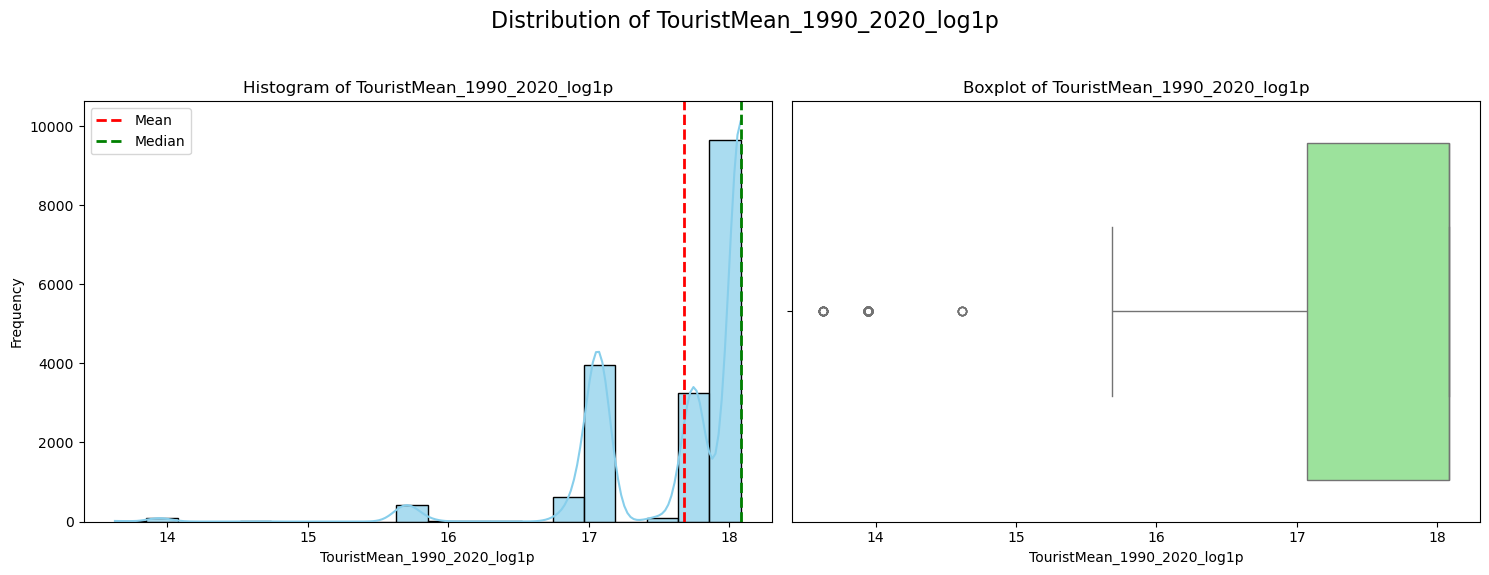

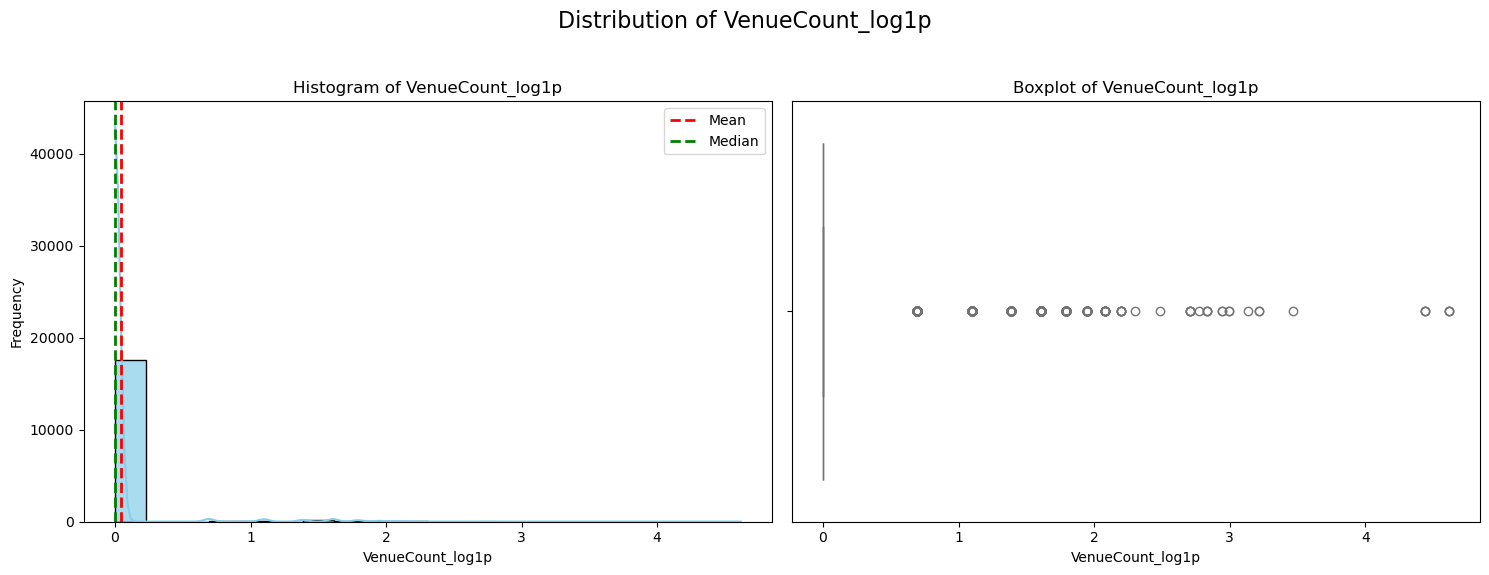

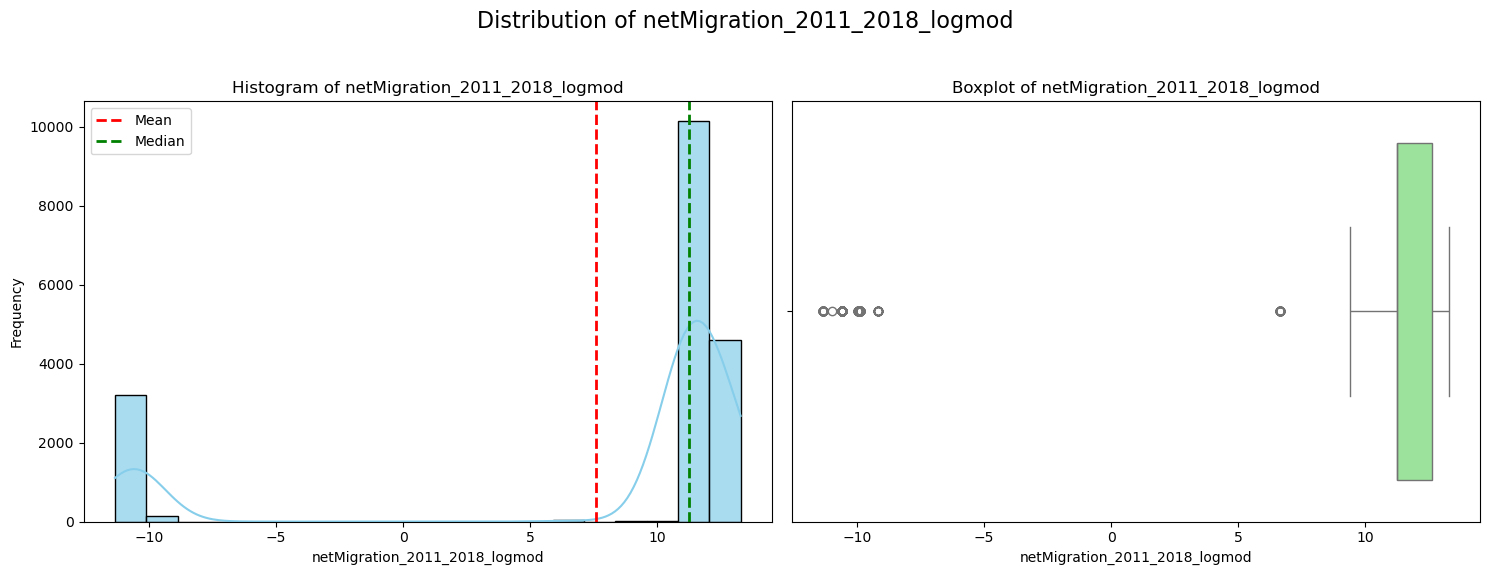

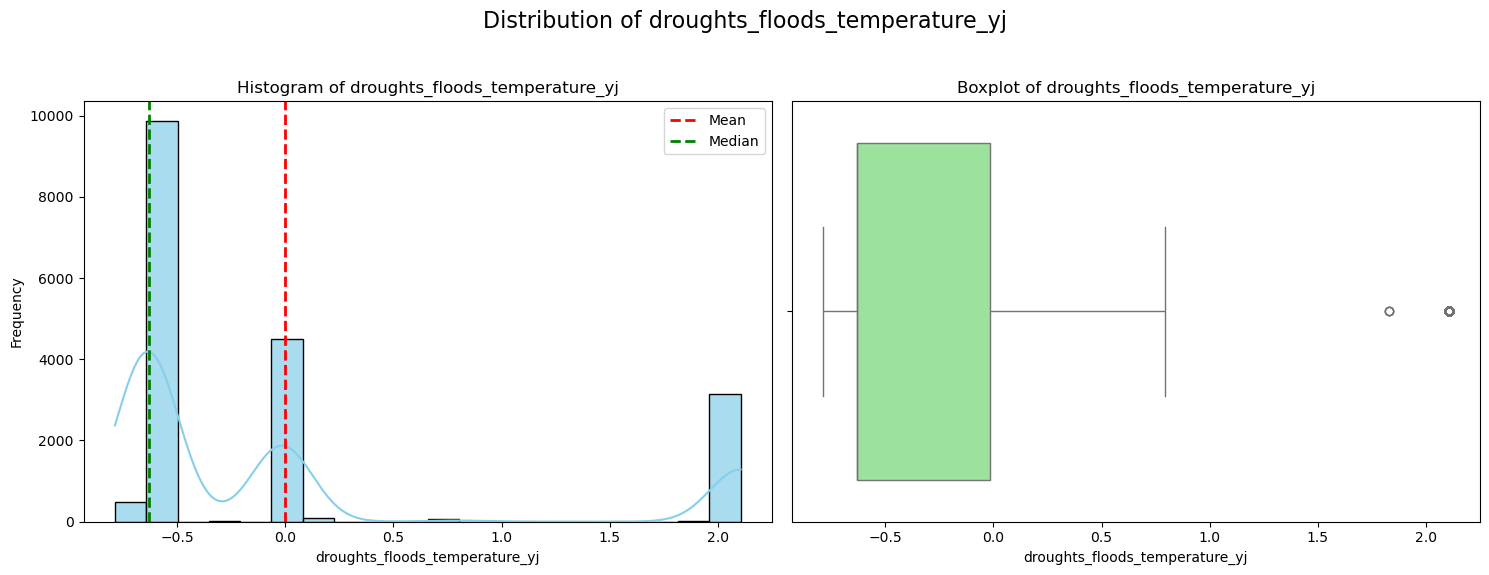

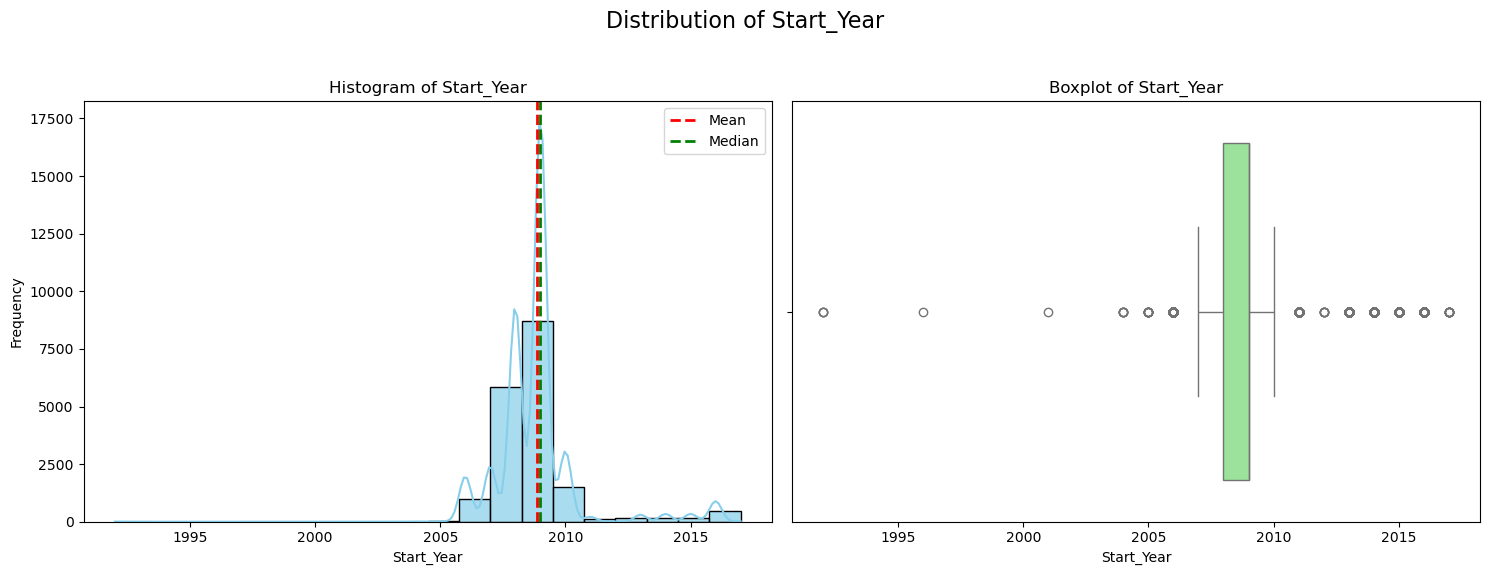

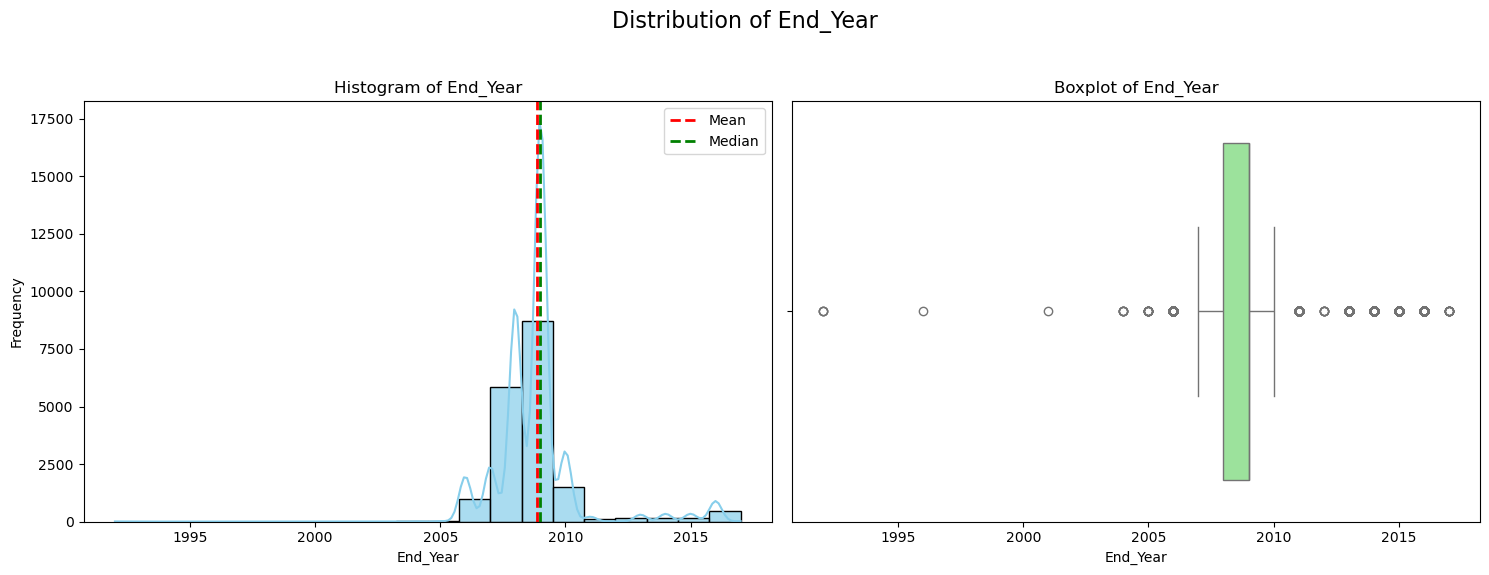

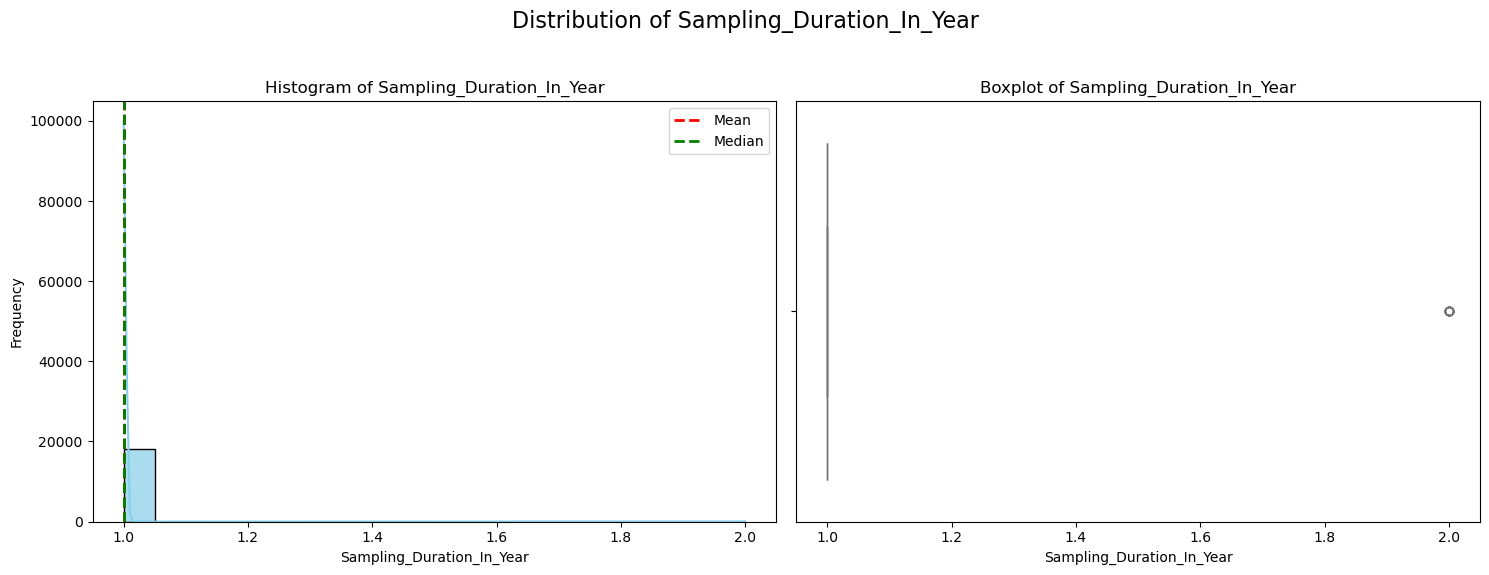

In [136]:
numerical_features = df_final.select_dtypes(include=np.number).columns.tolist() # Automatically get numerical columns

def show_distribution(data, variable, title="Distribution of Variable"):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Increased figure size

    # Histogram
    sns.histplot(data, x=variable, color='skyblue', alpha=0.7, kde=True, bins=20, ax=axes[0]) # Adjusted colors, alpha, bins
    axes[0].set_title(f"Histogram of {variable}") # more descriptive title
    axes[0].set_ylabel("Frequency")
    axes[0].axvline(data[variable].mean(), color='red', linestyle='--', linewidth=2, label="Mean") # added label
    axes[0].axvline(data[variable].median(), color='green', linestyle='--', linewidth=2, label="Median") # added label
    axes[0].legend() #added legend

    # Boxplot
    sns.boxplot(data, x=variable, color='lightgreen', ax=axes[1]) # Adjusted color
    axes[1].set_title(f"Boxplot of {variable}") # more descriptive title
    axes[1].set_xlabel(variable)

    fig.suptitle(title, fontsize=16) #Added overall figure title.
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent overlapping titles and labels
    plt.show()

# Example usage (assuming 'clean_data' and 'numeric_features' are defined):
for col in numerical_features:
    show_distribution(df_final, col, title=f"Distribution of {col}")

In [137]:
df_final.head()

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,waterBodyIdentifier,Country,TerraMarineProtected_2016_2018,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent,resultMeanValue_log1p,combustibleRenewables_2009_2014_log1p,PopulationDensity_log1p,gdp_log1p,TouristMean_1990_2020_log1p,VenueCount_log1p,netMigration_2011_2018_logmod,droughts_floods_temperature_yj,Start_Year,End_Year,Sampling_Duration_In_Year,resultUom_Desc
0,RW,CAS_14797-65-0,total,water,FRDR609,France,30.831906,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.061387,1.697053,4.814616,28.662794,18.080671,0.000000,11.235977,-0.632029,2009,2009,1,Nitrite (mg/L)
1,RW,CAS_14797-65-0,total,water,FRFR238,France,30.831906,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0.045674,1.697053,4.814616,28.662794,18.080671,0.000000,11.235977,-0.632029,2009,2009,1,Nitrite (mg/L)
2,RW,EEA_3164-07-6,total,water,FRFR238,France,30.831906,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,4.896787,1.697053,4.814616,28.662794,18.080671,0.000000,11.235977,-0.632029,2009,2009,1,Mass Ratio
3,RW,CAS_14797-55-8,total,water,FRFR327C,France,30.831906,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,2.531979,1.697053,4.814616,28.662794,18.080671,1.098612,11.235977,-0.632029,2009,2009,1,Nitrate (mg/L)
4,RW,EEA_3151-01-7,total,water,ES014MSPFES-014-NR-038-000-02-02,Spain,15.047884,49.0,8.0,3.0,14.0,15.0,9.0,2.0,0.0,16.84,0.187972,1.679577,4.550473,28.012541,17.746192,1.609438,-10.598040,2.105301,2009,2009,1,Millimoles per Liter


**Step 6: Save Processed Data**

In [141]:
# saving to csv in /data/processed/ folder

output_path = "../data/processed/processed_waterPollution.csv"

df_final.to_csv(output_path, index=False)

print(f"✅ Processed data saved to {output_path}")


✅ Processed data saved to ../data/processed/processed_waterPollution.csv
